# Project Housing


## Problem Statement:


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

-Which variables are important to predict the price of variable?

-How do these variables describe the price of the house?



## Business Goal:


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.



## Technical Requirements:


-Data contains 1460 entries each having 81 variables.

-Data contains Null values. We need to treat them using the domain knowledge and our own understanding.


-Extensive EDA has to be performed to gain relationships of important variable and price.


-Data contains numerical as well as categorical variable. We need to handle them accordingly.


-We have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.


-We need to find important features which affect the price positively or negatively.


-Two datasets are being provided to us (test.csv, train.csv). We will train on train.csv dataset and predict on test.csv file.


# Importing Required Libraries


In [110]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries/dependencies here.



In [111]:
train_df = pd.read_csv("Project Housing train data.csv")


I am importing the train dataset comma separated values file and storing it into our dataframe for further usage.



In [112]:
train_df


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 1168 rows and 81 columns present in our dataframe. In the above cell we can see the training dataset which includes the target label "SalePrice" column and the remaining feature columns that determine or help in predicting the sales. Since sales is a continous value this becomes a Regression problem



# Exploratory Data Analysis (EDA)


In [113]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.



In [114]:
print("We have {} Rows and {} Columns in our dataframe".format(train_df.shape[0], train_df.shape[1]))
train_df.head()

We have 1168 Rows and 81 Columns in our dataframe


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

# Columns Description:


MSSubClass: Identifies the type of dwelling involved in the sale.



In [115]:
train_df.isna().sum() # checking for missing values


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Using the "isna" and "sum" fuctions together on our dataframe we can take a look at missing data information. It looks like we do have missing values present in few of our columns. However we will check the percentage of missing information before we began treating them.



In [116]:
print("Missing column values in percentage:")
for col in train_df:
    percentage = np.round((train_df[col].isnull().sum()/train_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 18.322 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 93.408 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.654 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Bedr

So the column names and the percentage of missing data can be seen below: LotFrontage : 18.322 % Alley : 93.408 % MasVnrType : 0.599 % MasVnrArea : 0.599 % BsmtQual : 2.568 % BsmtCond : 2.568 % BsmtExposure : 2.654 % BsmtFinType1 : 2.568 % BsmtFinType2 : 2.654 % FireplaceQu : 47.175 % GarageType : 5.479 % GarageYrBlt : 5.479 % GarageFinish : 5.479 % GarageQual : 5.479 % GarageCond : 5.479 % PoolQC : 99.401 % Fence : 79.709 % MiscFeature : 96.233 %

Now I have decided to drop columns that have most of their values or almost of their values filled with a "null". The columns that I am going to drop are as follows: Alley : 93.408 % FireplaceQu : 47.175 % PoolQC : 99.401 % Fence : 79.709 % MiscFeature : 96.233 %

In [117]:
# data preprocessing 1
train_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

I have successfully got rid of all the columns that had most of the values filled with null because treating them would mean manually entering data that was not originally collected properly and that would only make the model biased towards the few information we could get hold of.



In [118]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(train_df.shape[0], train_df.shape[1]))
train_df.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(train_df.shape[0], train_df.shape[1]))

We had 1168 Rows and 76 Columns before dropping duplicates.
We have 1168 Rows and 76 Columns after dropping duplicates.


With the drop_duplicates option I was trying to get rid of all the duplicate values present in our dataset. However, we can see that there are no duplicate data present in our dataset.



In [119]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In the above cell we see that there are 3 columns with float datatype, 35 columns with integer datatype and 38 columns with object datatype.



In [120]:
train_df.nunique().to_frame("Unique Values")


Unique Values
Id                      1168
MSSubClass                15
MSZoning                   5
LotFrontage              106
LotArea                  892
Street                     2
LotShape                   4
LandContour                4
Utilities                  1
LotConfig                  5
LandSlope                  3
Neighborhood              25
Condition1                 9
Condition2                 8
BldgType                   5
HouseStyle                 8
OverallQual               10
OverallCond                9
YearBuilt                110
YearRemodAdd              61
RoofStyle                  6
RoofMatl                   8
Exterior1st               14
Exterior2nd               15
MasVnrType                 4
MasVnrArea               283
ExterQual                  4
ExterCond                  5
Foundation                 6
BsmtQual                   4
BsmtCond                   4
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               551
BsmtFinType2               6
BsmtFinSF2               122
BsmtUnfSF                681
TotalBsmtSF              636
Heating                    6
HeatingQC                  5
CentralAir                 2
Electrical                 5
1stFlrSF                 669
2ndFlrSF                 351
LowQualFinSF              21
GrLivArea                746
BsmtFullBath               4
BsmtHalfBath               3
FullBath                   4
HalfBath                   3
BedroomAbvGr               8
KitchenAbvGr               4
KitchenQual                4
TotRmsAbvGrd              12
Functional                 7
Fireplaces                 4
GarageType                 6
GarageYrBlt               97
GarageFinish               3
GarageCars                 5
GarageArea               392
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF               244
OpenPorchSF              176
EnclosedPorch            106
3SsnPorch                 18
ScreenPorch               65
PoolArea                   8
MiscVal                   20
MoSold                    12
YrSold                     5
SaleType                   9
SaleCondition              6
SalePrice                581

We are taking a look at all the unique value information present in each of the columns and remove any column that has all the rows filled with same value or all with different unique values since they are not gonna help while building our machine learning model.



In [121]:
# data preprocessing 2
train_df.drop(["Id", "Utilities"], axis=1, inplace=True)

I see that column Id has all the rows filled with unique data while the column Utilities has only 1 unique value occupying all the rows so they both are not useful and I have dropped them from our dataframe.



In [122]:
object_datatype = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'O':
        object_datatype.append(x)        
print(f"Object Datatype Column Names", object_datatype)

numeric_datatype = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'int64' or train_df.dtypes[x] == 'float64':
        numeric_datatype.append(x)
print(f"\nNumeric Datatype Column Names:", numeric_datatype)

Object Datatype Column Names ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numeric Datatype Column Names: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 

Since we have numeric as well as object datatype values I have separated those columns names in 2 different list variables that would be usefull in further analysis.



In [123]:
train_df.describe().T


count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt      1980.0    2002.0    2010.0  
GarageC

Using the "describe" method in transpose format I am taking a look at all the numeric value details and basically the count, mean, standard deviation, min, 25%, 50%, 75% and max quartile values.



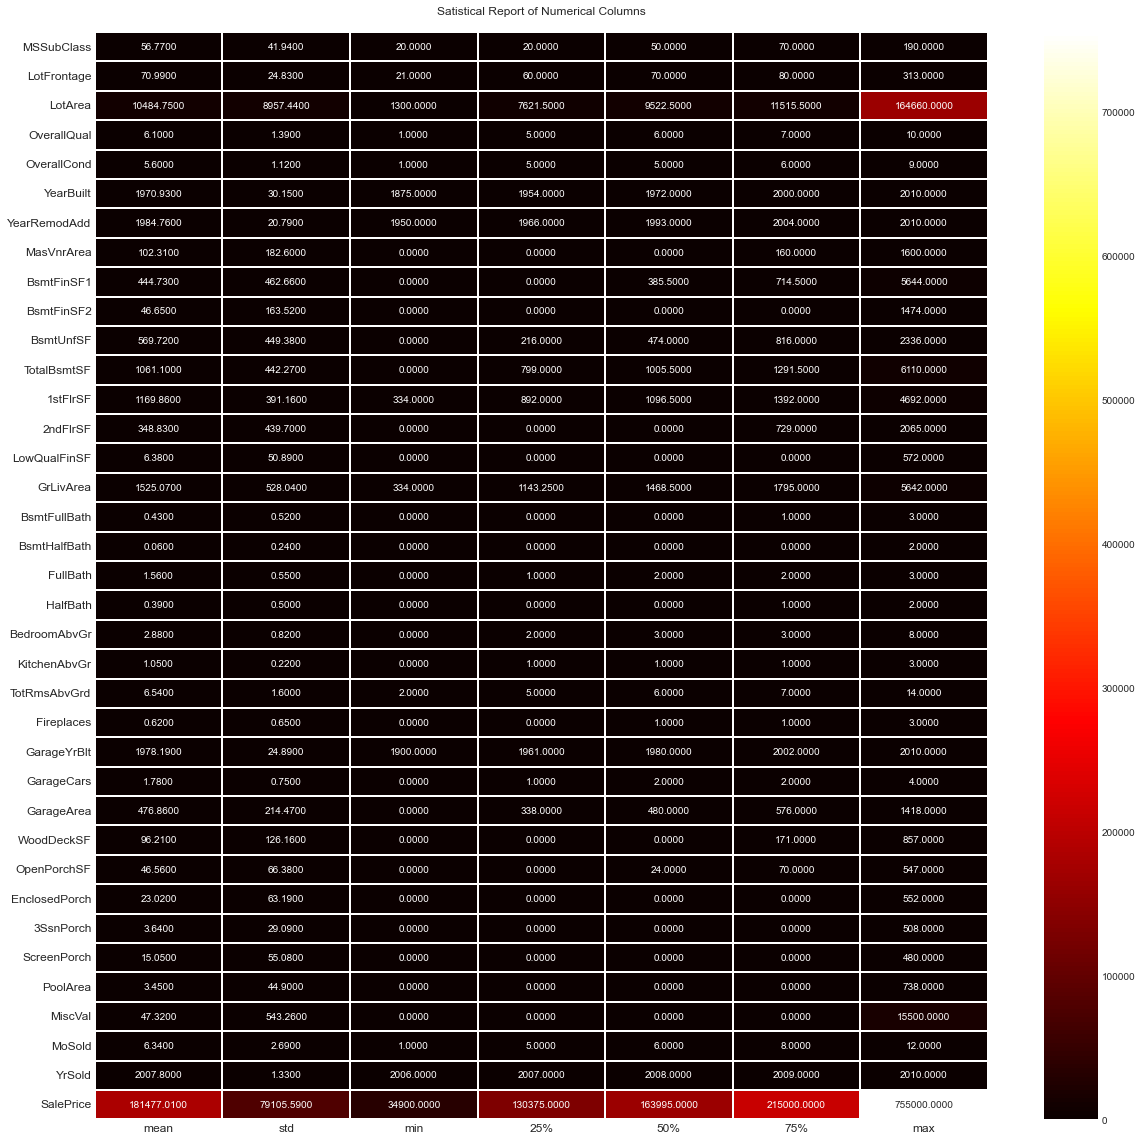

In [124]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (20,20))
sns.heatmap(round(train_df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Using the above visualization on the describe method we are able to observe that our target label "SalePrice" has values that are higher than the other feature column details.



In [125]:
for col in object_datatype:
    print(col)
    print(train_df[col].value_counts())
    print("="*60)

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64
Condition1
Norm      1005
Feedr       67


In the above cell I am taking a look at all the unique value details present in columns that have object datatype values stored in them.



In [126]:
train_df.corr()


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.365220 -0.124151     0.070462    -0.056978   
LotFrontage     -0.365220     1.000000  0.557257     0.247809    -0.053345   
LotArea         -0.124151     0.557257  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.247809  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.053345  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.118554  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.096050  0.027228     0.555945     0.080669   
MasVnrArea       0.027868     0.202225  0.121448     0.409163    -0.137882   
BsmtFinSF1      -0.052236     0.247780  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002514  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.123943  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.386261  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.448186  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.099250  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007885 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.410414  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.104255  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001528  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.189321  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.053168  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.264010  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002890 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.351969  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.262076  0.285983     0.390067    -0.013632   
GarageYrBlt      0.077630     0.061101 -0.034981     0.541719    -0.318278   
GarageCars      -0.027639     0.276798  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.344908  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.101751  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.167092  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.023118 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.059508  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.033111  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.223429  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.004559  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.025046  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004296 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.341294  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027868   -0.052236   -0.062403   
LotFrontage     0.118554      0.096050    0.202225    0.247780    0.002514   
LotArea         0.005506      0.027228    0.121448    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.409163    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137882   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.323006    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181869    0.114430   -0.044694   
MasVnrArea      0.323006      0.181869    1.000000    0.267066   -0.065723   
BsmtFinSF1      0.227933      0.114430    0.267066    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065723   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109850   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.366833    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

Checking the correlation values for all the numeric datatype columns.



In [127]:
print("Missing Value Data:")
print(train_df.isnull().sum())
print("\nDataframe Information:")
train_df.info()

Missing Value Data:
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath      

Performing analysis in the above cell I was able to come to a conclusion on how I would want to handle the missing data issue in my dataset. I am planning to replace the object datatype columns with mode values and numeric datatype columns with it's mean values.

# Filling the missing values using mean and mode options


In [128]:
# data preprocessing 3
mode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
        "GarageFinish", "GarageQual", "GarageCond"]
mean = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for i in mode:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
    
for j in mean:
    train_df[j] = train_df[j].fillna(train_df[j].mean())
    
print("Missing values count after filling the data")
print(train_df.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

It looks like we have handled the missing values issue and now none of the columns have any null value in them.



# Data Visualization


In [129]:
train_df.nunique().sort_values()


CentralAir         2
Street             2
GarageFinish       3
HalfBath           3
LandSlope          3
BsmtHalfBath       3
PavedDrive         3
BsmtExposure       4
BsmtCond           4
BsmtQual           4
MasVnrType         4
Fireplaces         4
KitchenQual        4
ExterQual          4
FullBath           4
KitchenAbvGr       4
BsmtFullBath       4
LotShape           4
LandContour        4
Electrical         5
MSZoning           5
YrSold             5
ExterCond          5
LotConfig          5
BldgType           5
GarageCond         5
HeatingQC          5
GarageQual         5
GarageCars         5
GarageType         6
SaleCondition      6
BsmtFinType2       6
Heating            6
Foundation         6
RoofStyle          6
BsmtFinType1       6
Functional         7
RoofMatl           8
PoolArea           8
HouseStyle         8
Condition2         8
BedroomAbvGr       8
OverallCond        9
Condition1         9
SaleType           9
OverallQual       10
TotRmsAbvGrd      12
MoSold       

I have sorted the unique values column name list to see the one's with least unique values and the one's with the most in them.



In [130]:
single = ["CentralAir", "Street", "GarageFinish", "HalfBath", "LandSlope", "BsmtHalfBath", "PavedDrive", "BsmtExposure",
         "BsmtCond", "BsmtQual", "MasVnrType", "Fireplaces", "KitchenQual", "ExterQual", "FullBath", "KitchenAbvGr",
         "BsmtFullBath", "LotShape", "LandContour", "Electrical", "MSZoning", "YrSold", "ExterCond", "LotConfig",
         "BldgType", "GarageCond", "HeatingQC", "GarageQual", "GarageCars", "GarageType", "SaleCondition", "BsmtFinType2",
         "Heating", "Foundation", "RoofStyle", "BsmtFinType1", "Functional", "RoofMatl", "PoolArea", "HouseStyle",
         "Condition2", "BedroomAbvGr", "OverallCond", "Condition1", "SaleType"]

double = ["OverallQual", "TotRmsAbvGrd", "MoSold", "Exterior1st", "MSSubClass", "Exterior2nd", "3SsnPorch", "MiscVal", 
          "LowQualFinSF", "Neighborhood", "YearRemodAdd", "ScreenPorch", "GarageYrBlt"]

triple = ["EnclosedPorch", "LotFrontage", "YearBuilt", "BsmtFinSF2", "OpenPorchSF", "WoodDeckSF", "MasVnrArea", 
          "2ndFlrSF", "GarageArea", "BsmtFinSF1", "SalePrice", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "GrLivArea", 
          "LotArea"]

I have separated the column names as per the unique values they hold in single digit, double digit and triple digit formats.



Single Digit Unique Values:



Single digit category column name: CentralAir


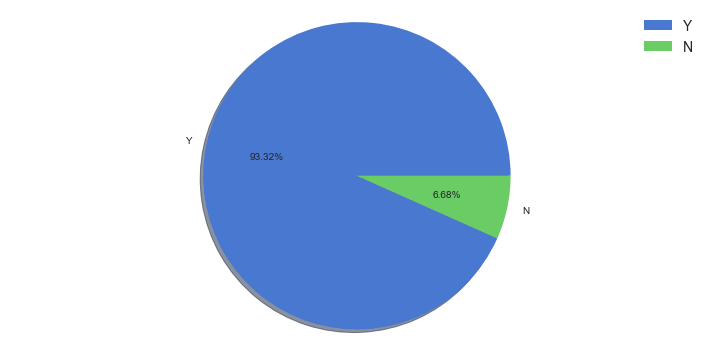

Single digit category column name: Street


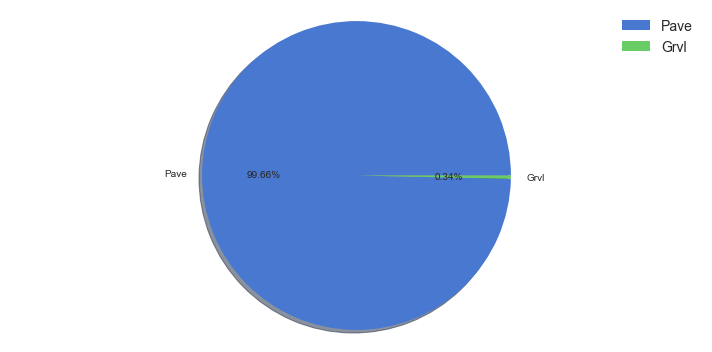

Single digit category column name: GarageFinish


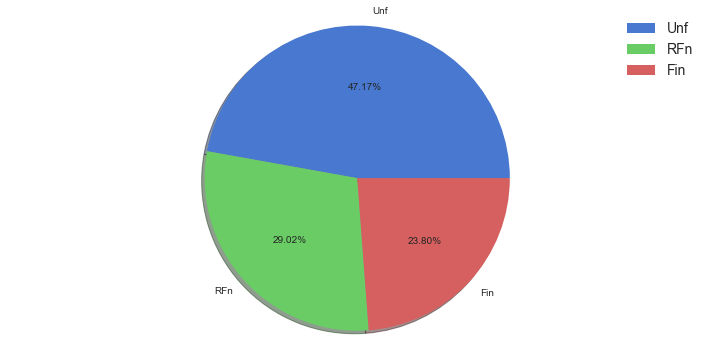

Single digit category column name: HalfBath


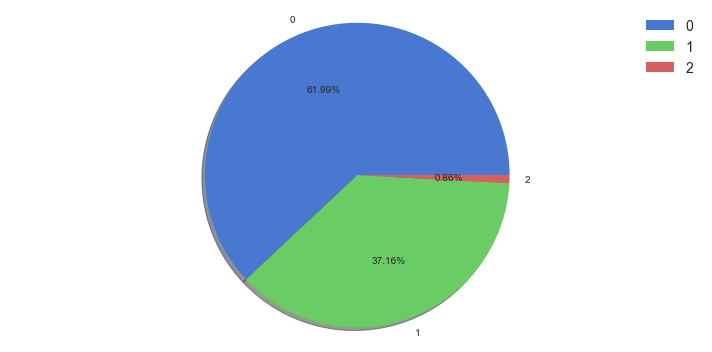

Single digit category column name: LandSlope


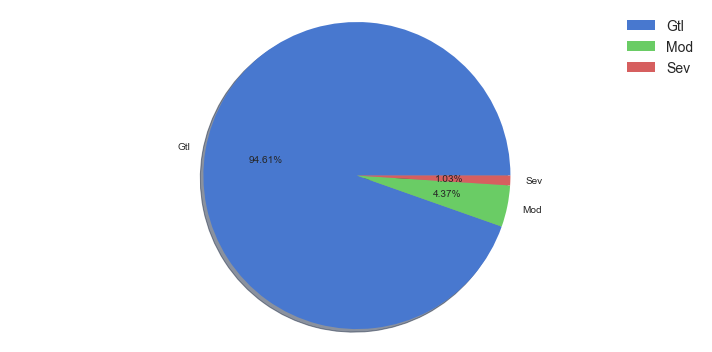

Single digit category column name: BsmtHalfBath


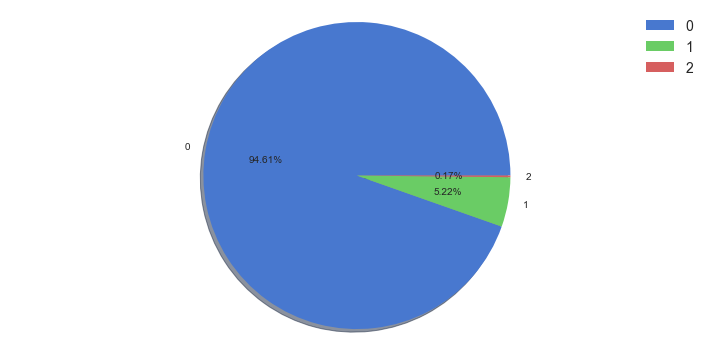

Single digit category column name: PavedDrive


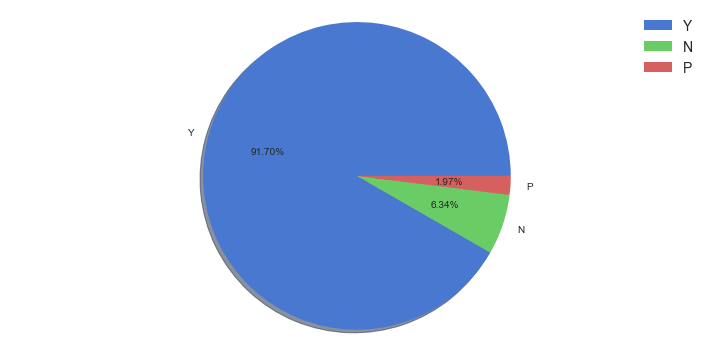

Single digit category column name: BsmtExposure


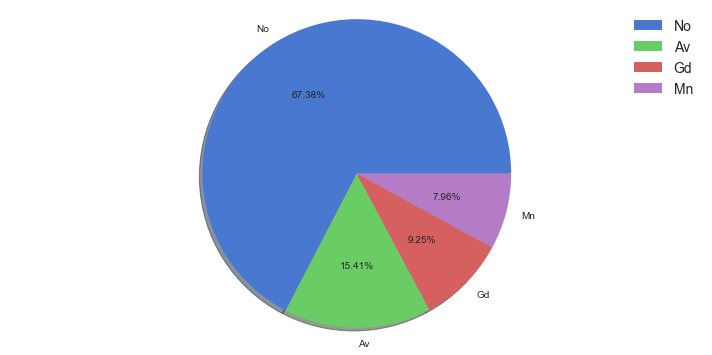

Single digit category column name: BsmtCond


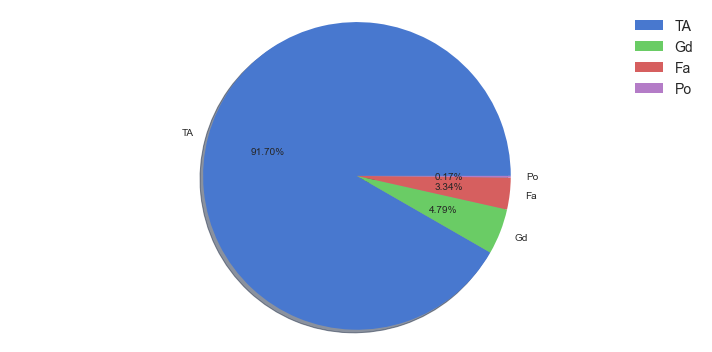

Single digit category column name: BsmtQual


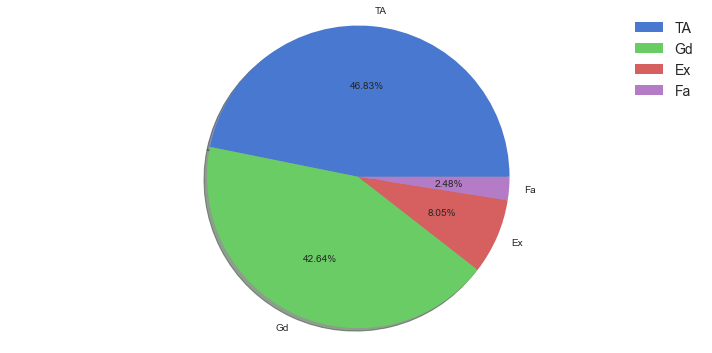

Single digit category column name: MasVnrType


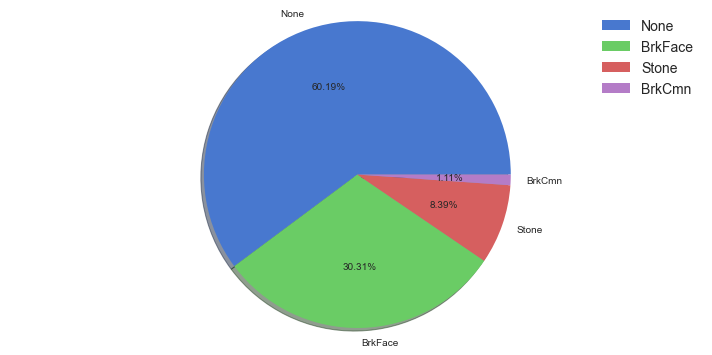

Single digit category column name: Fireplaces


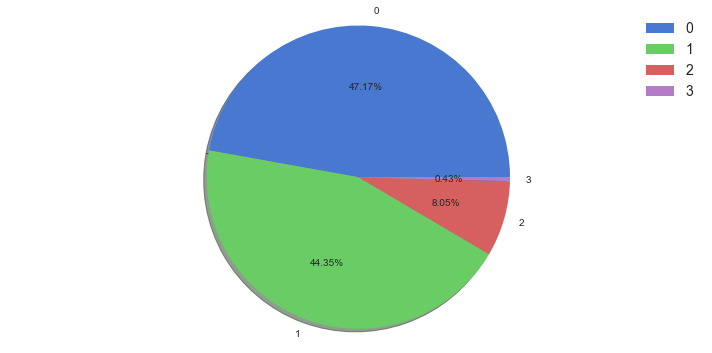

Single digit category column name: KitchenQual


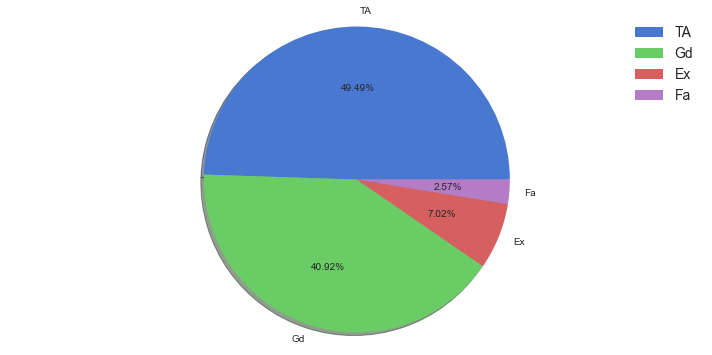

Single digit category column name: ExterQual


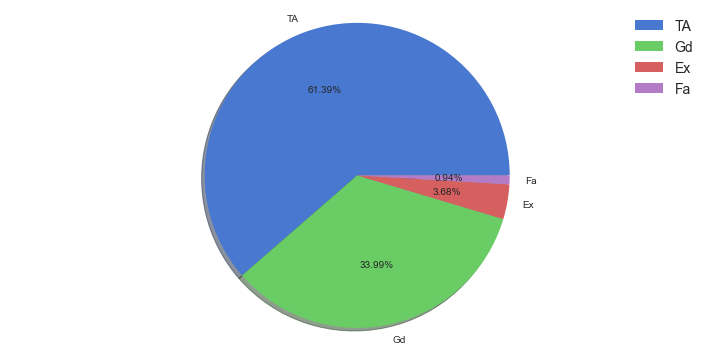

Single digit category column name: FullBath


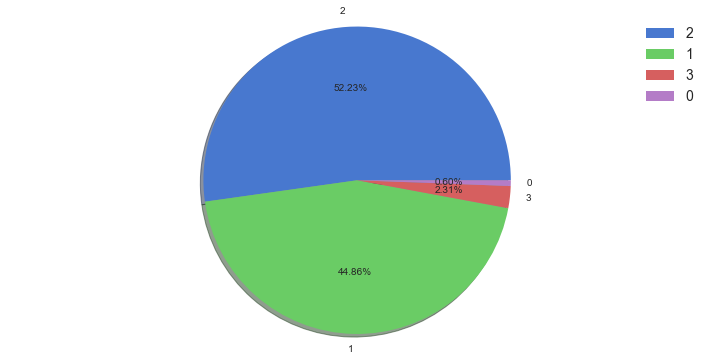

Single digit category column name: KitchenAbvGr


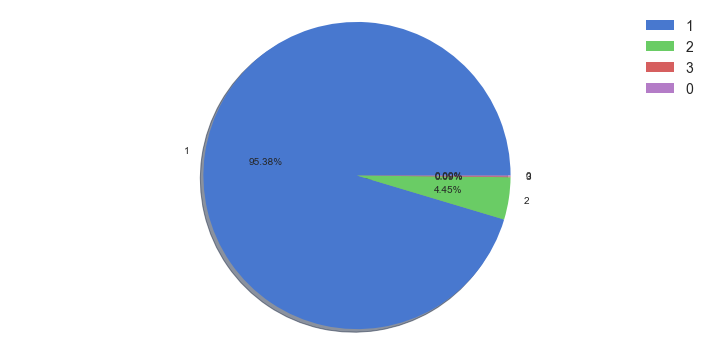

Single digit category column name: BsmtFullBath


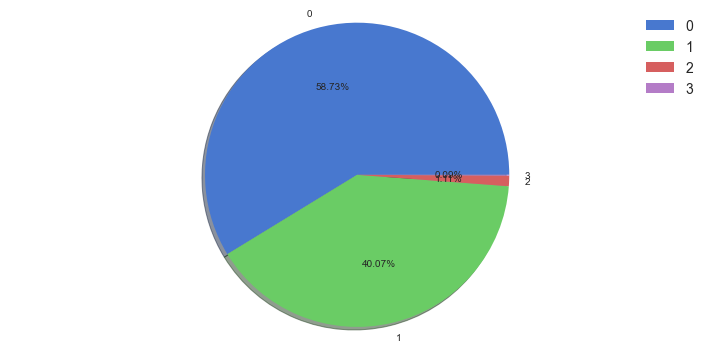

Single digit category column name: LotShape


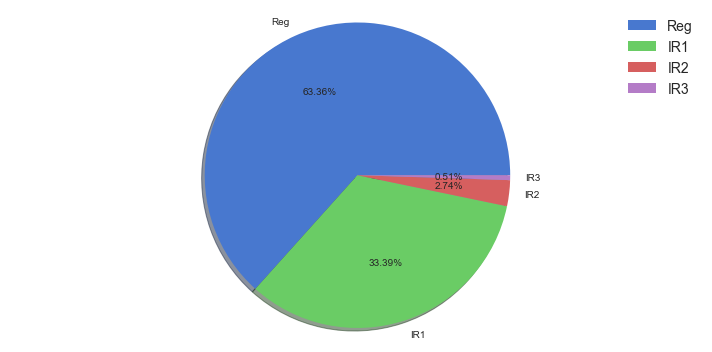

Single digit category column name: LandContour


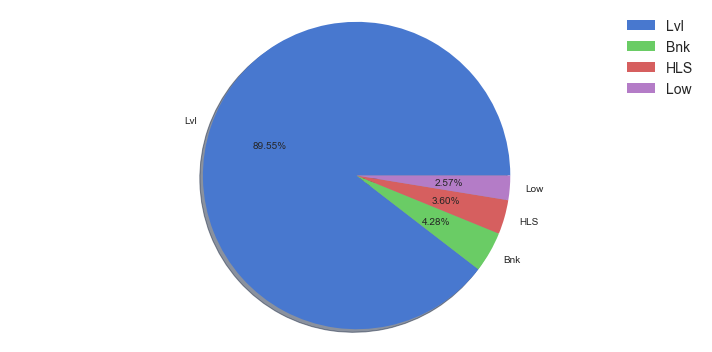

Single digit category column name: Electrical


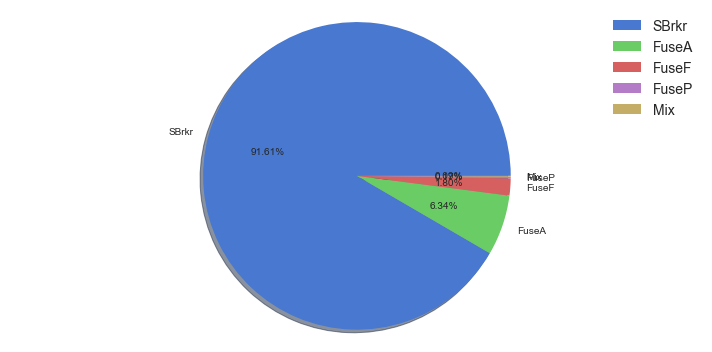

Single digit category column name: MSZoning


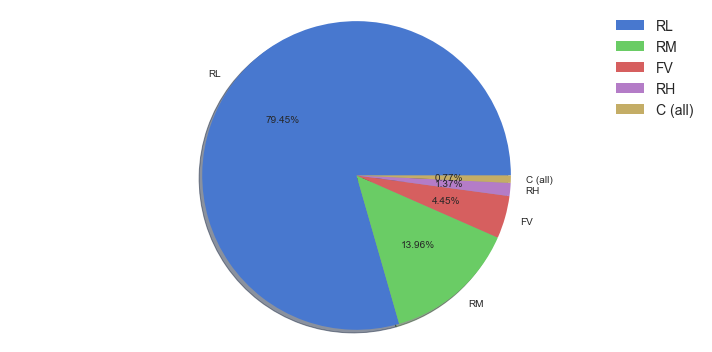

Single digit category column name: YrSold


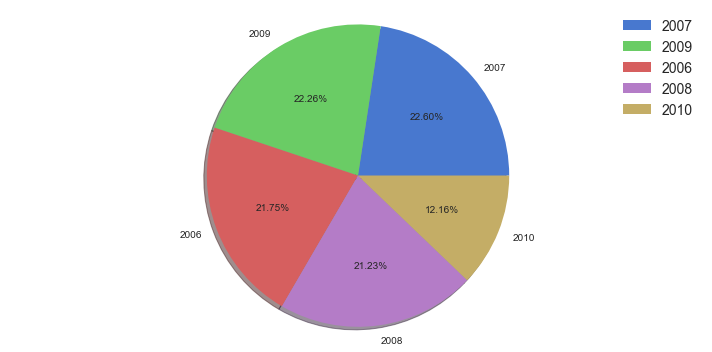

Single digit category column name: ExterCond


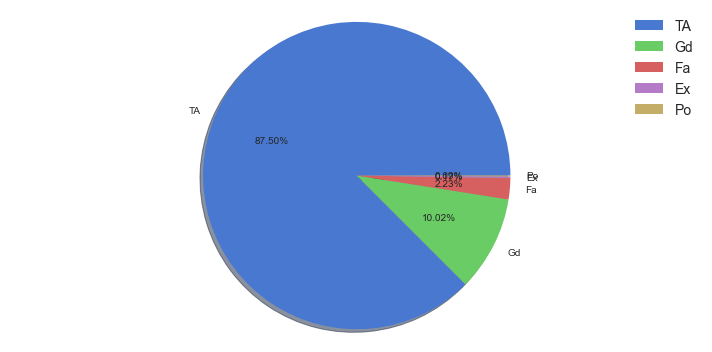

Single digit category column name: LotConfig


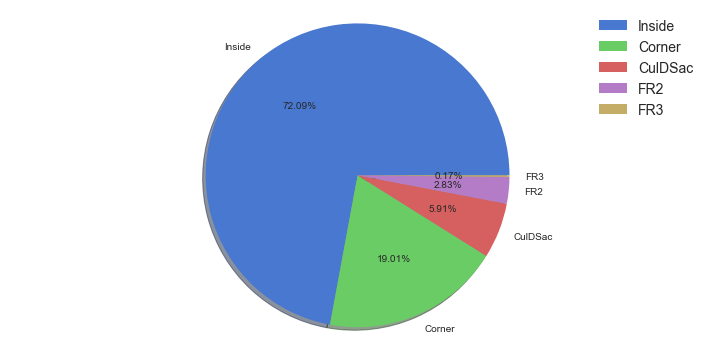

Single digit category column name: BldgType


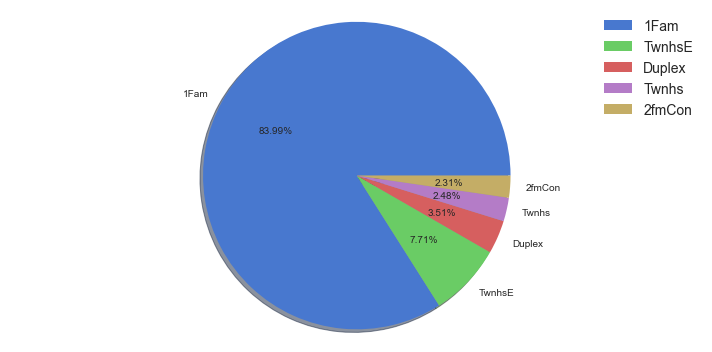

Single digit category column name: GarageCond


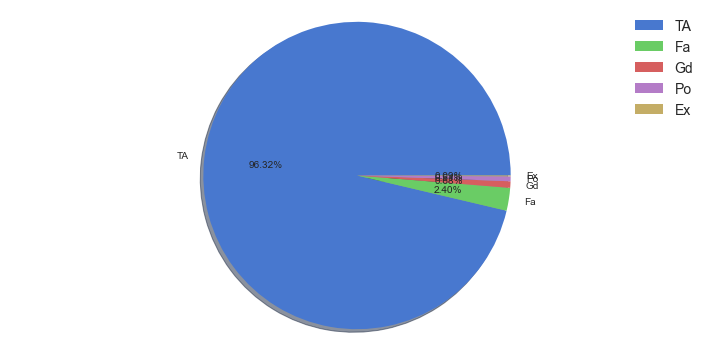

Single digit category column name: HeatingQC


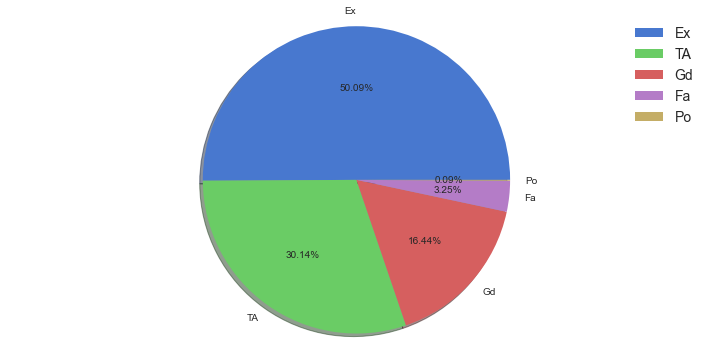

Single digit category column name: GarageQual


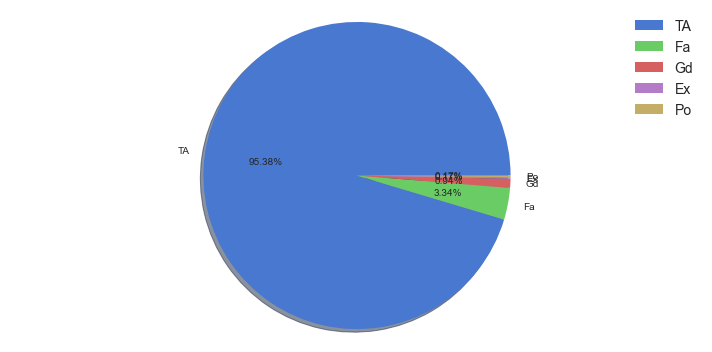

Single digit category column name: GarageCars


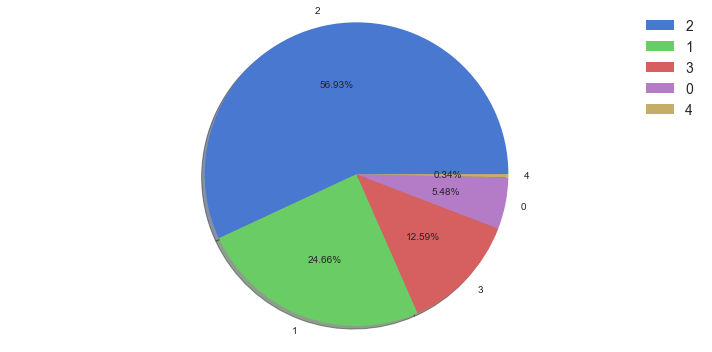

Single digit category column name: GarageType


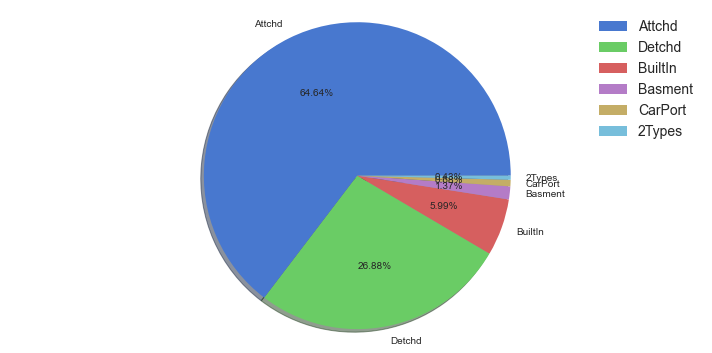

Single digit category column name: SaleCondition


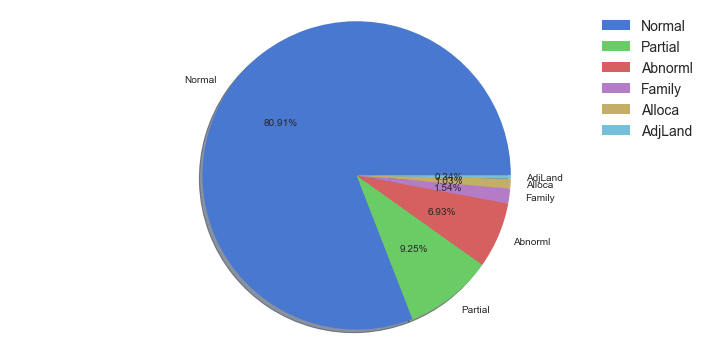

Single digit category column name: BsmtFinType2


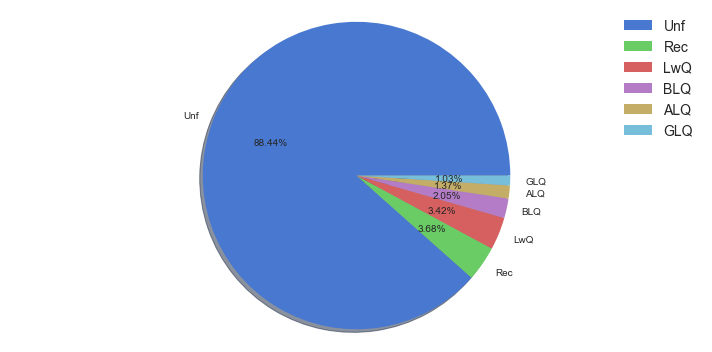

Single digit category column name: Heating


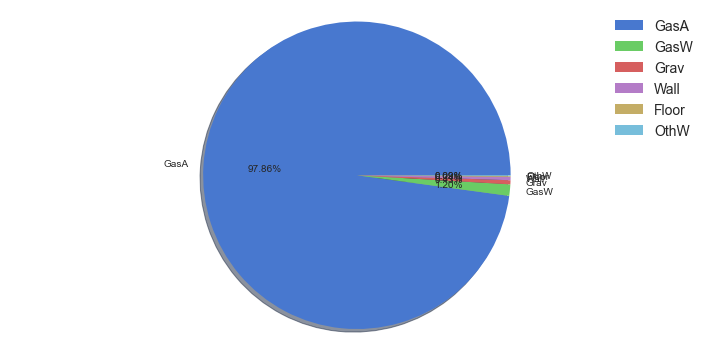

Single digit category column name: Foundation


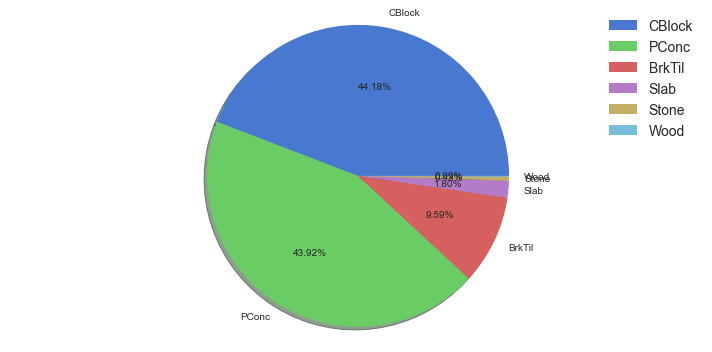

Single digit category column name: RoofStyle


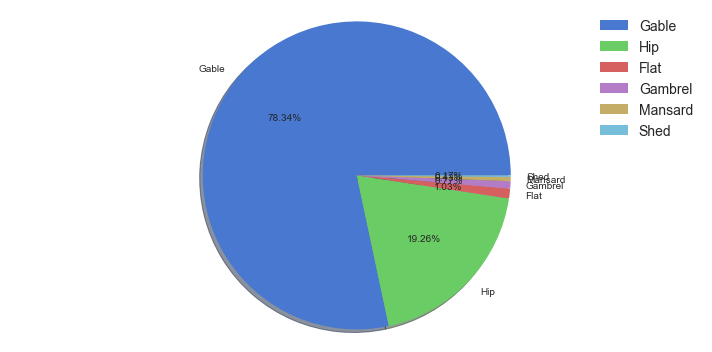

Single digit category column name: BsmtFinType1


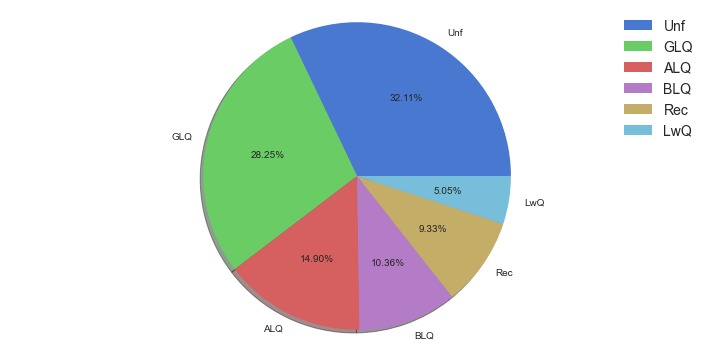

Single digit category column name: Functional


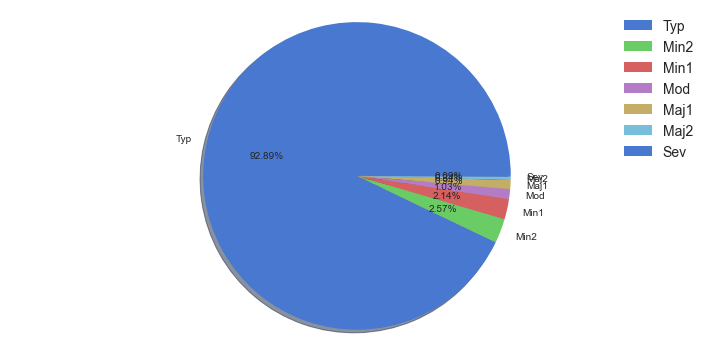

Single digit category column name: RoofMatl


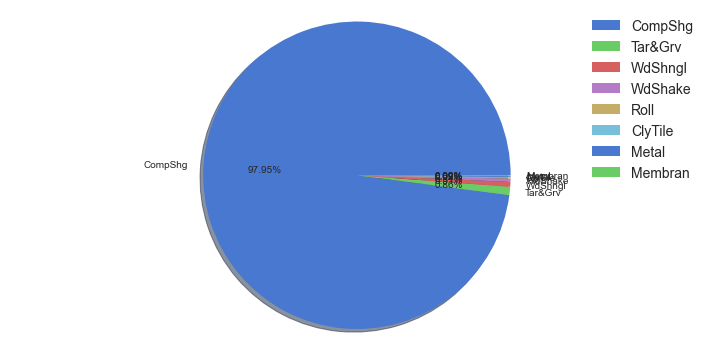

Single digit category column name: PoolArea


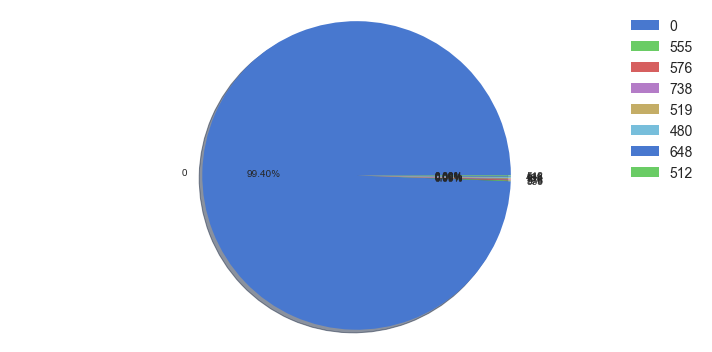

Single digit category column name: HouseStyle


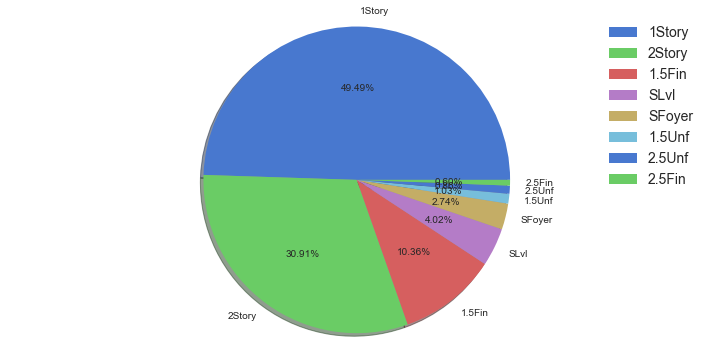

Single digit category column name: Condition2


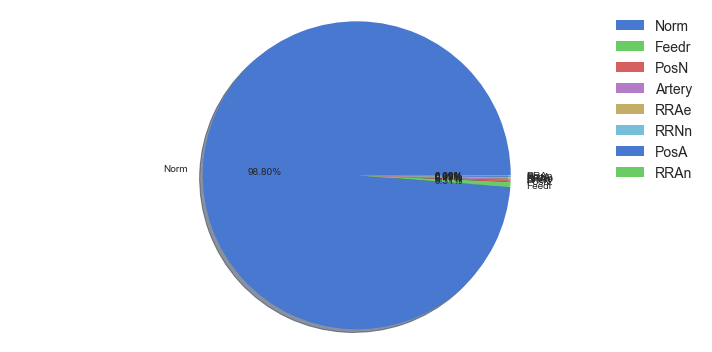

Single digit category column name: BedroomAbvGr


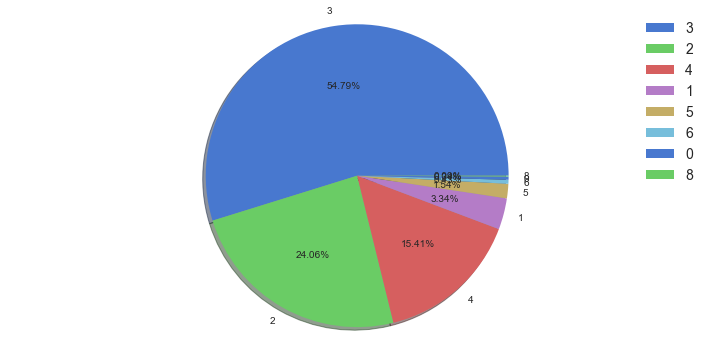

Single digit category column name: OverallCond


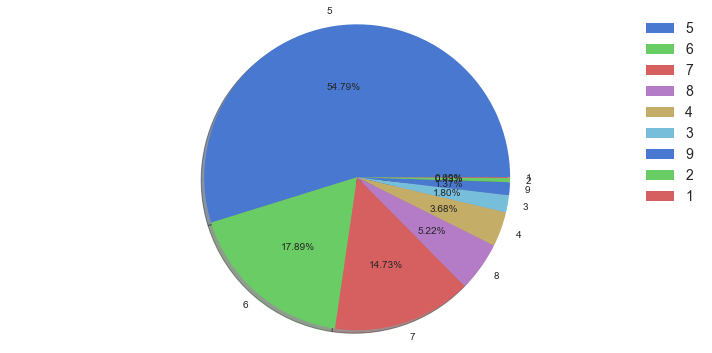

Single digit category column name: Condition1


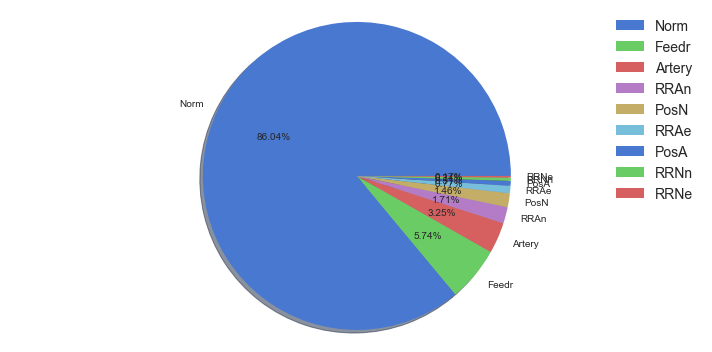

Single digit category column name: SaleType


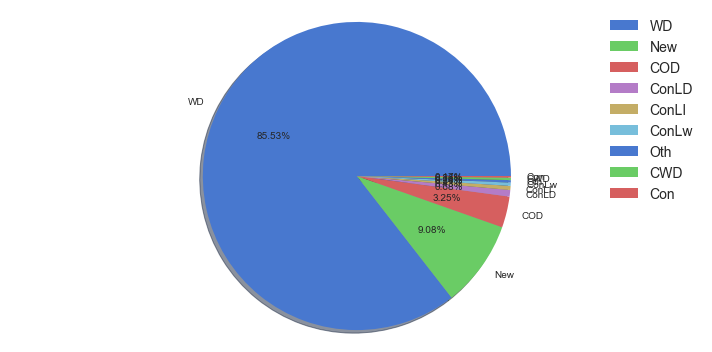

In [131]:
plt.style.use('seaborn-muted')
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

for i in train_df[single]:
    print(f"Single digit category column name:", i)
    generate_pie(train_df[i])

# Observations:


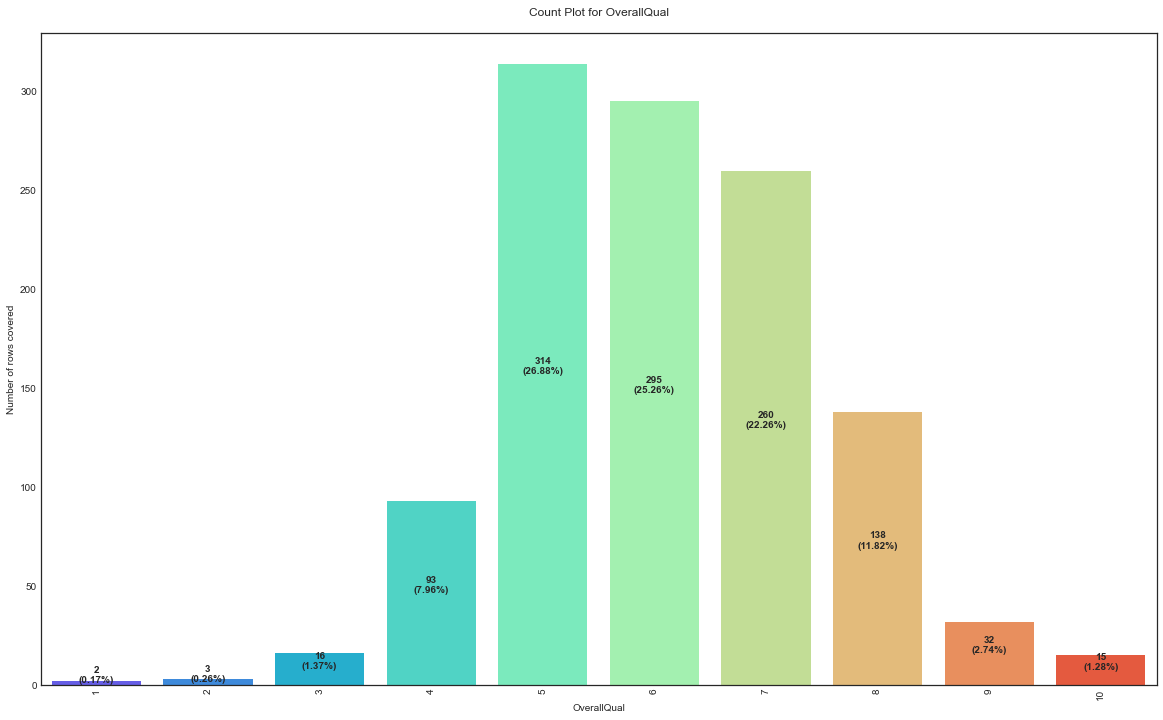

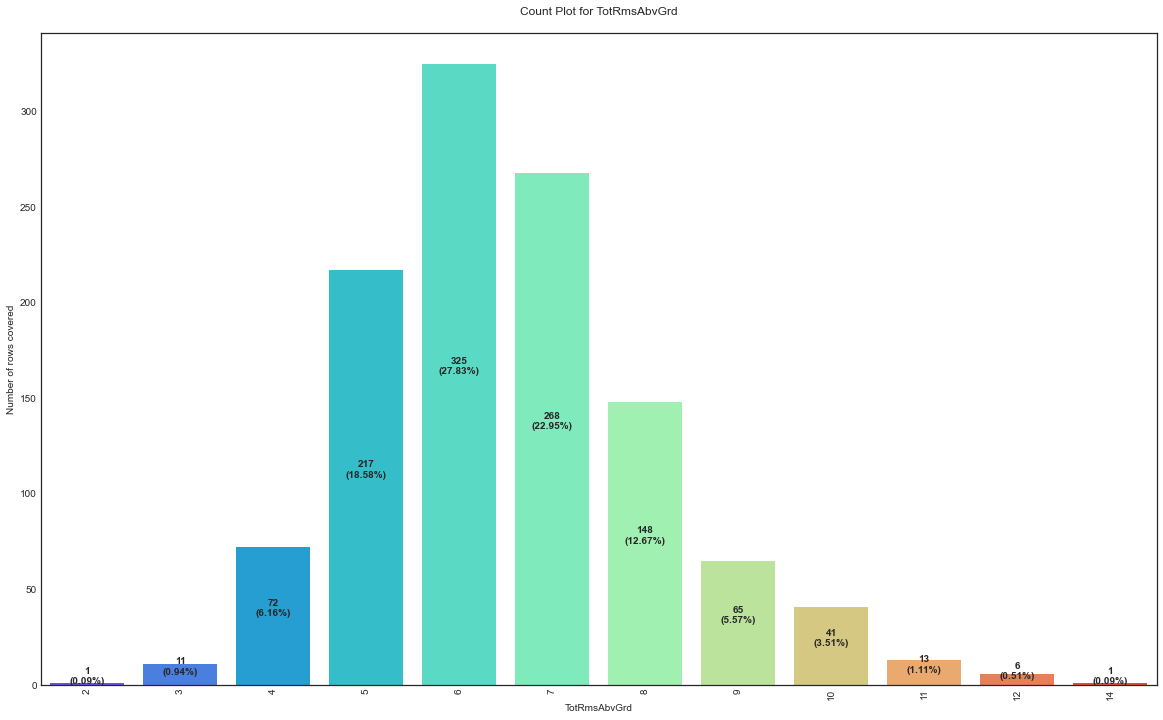

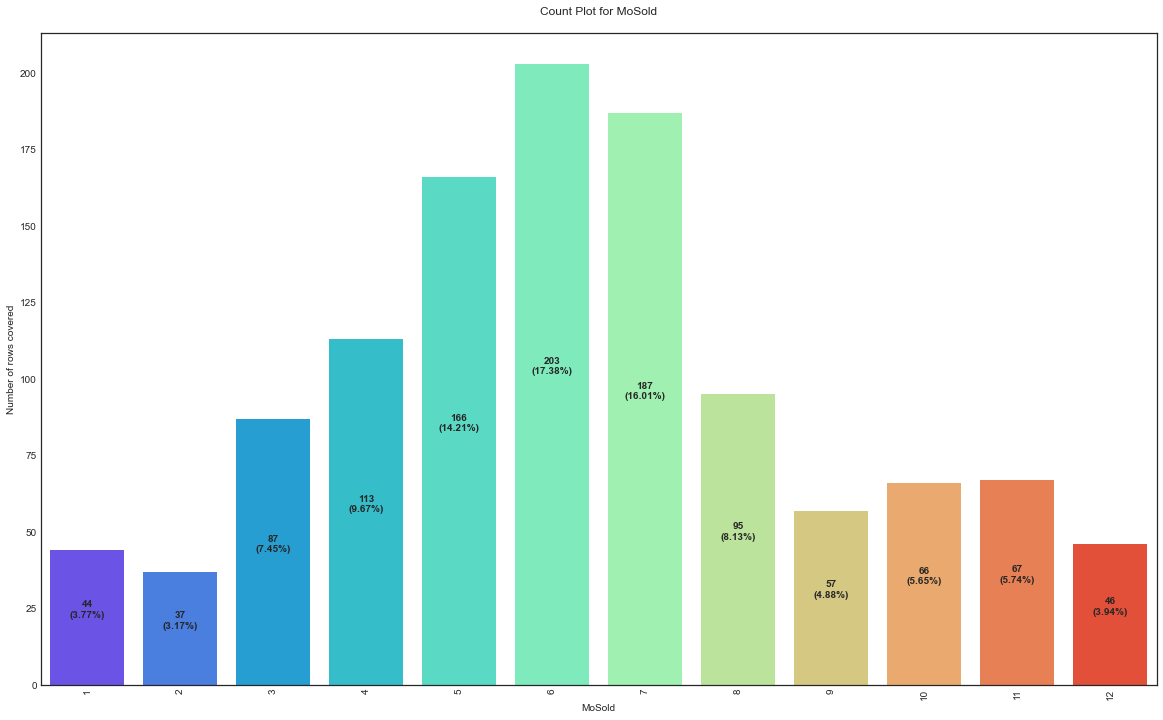

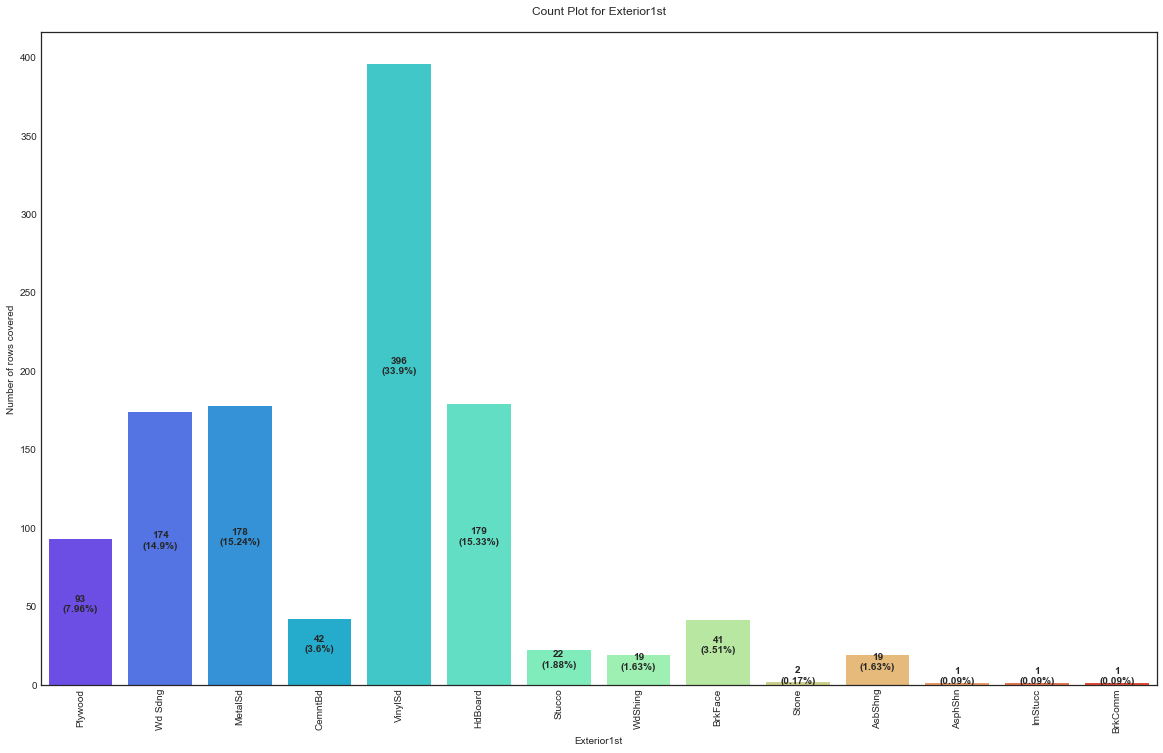

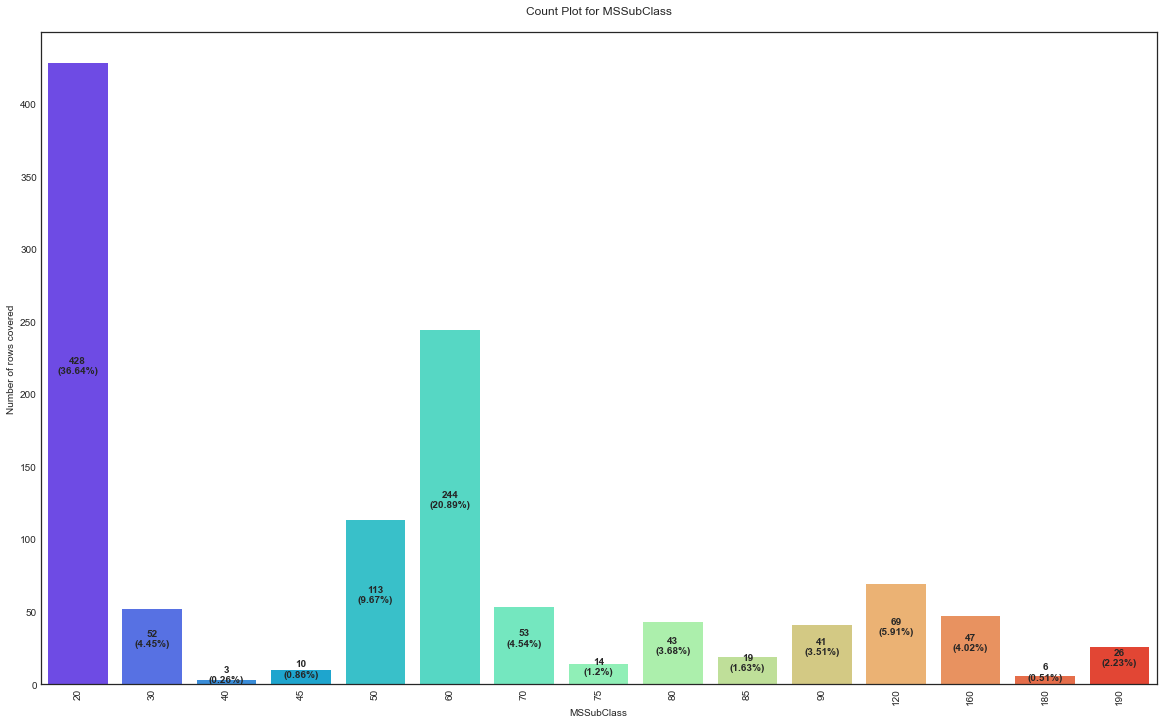

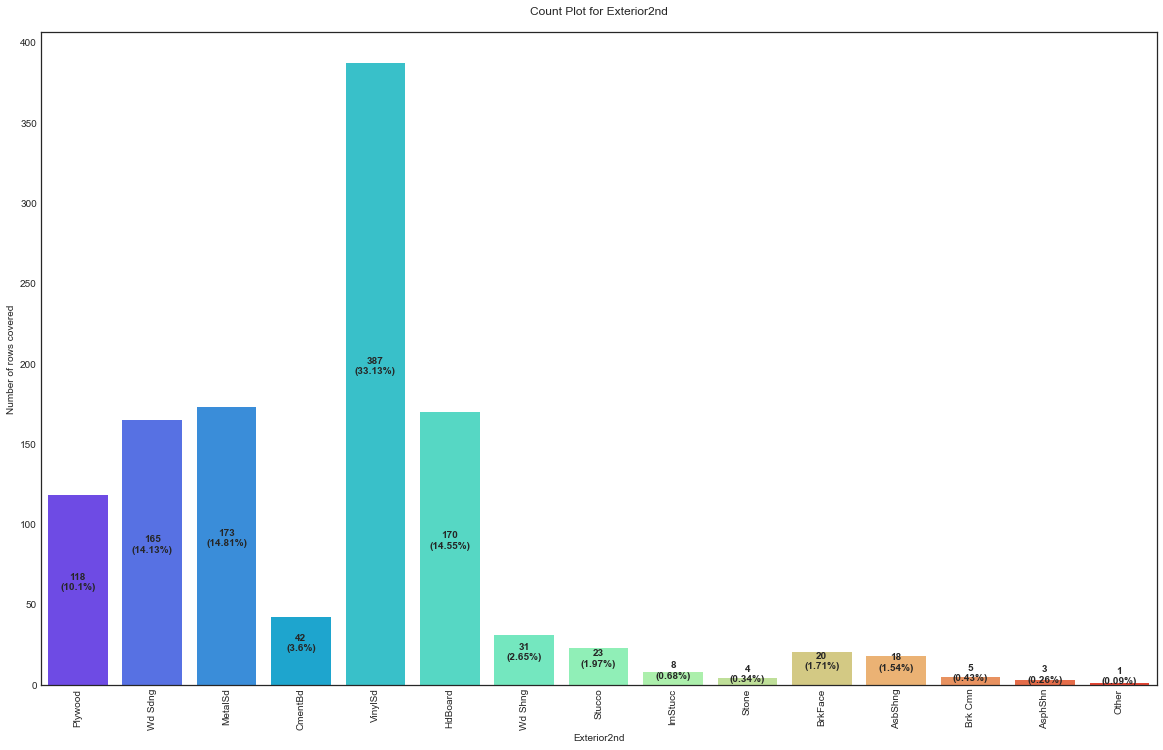

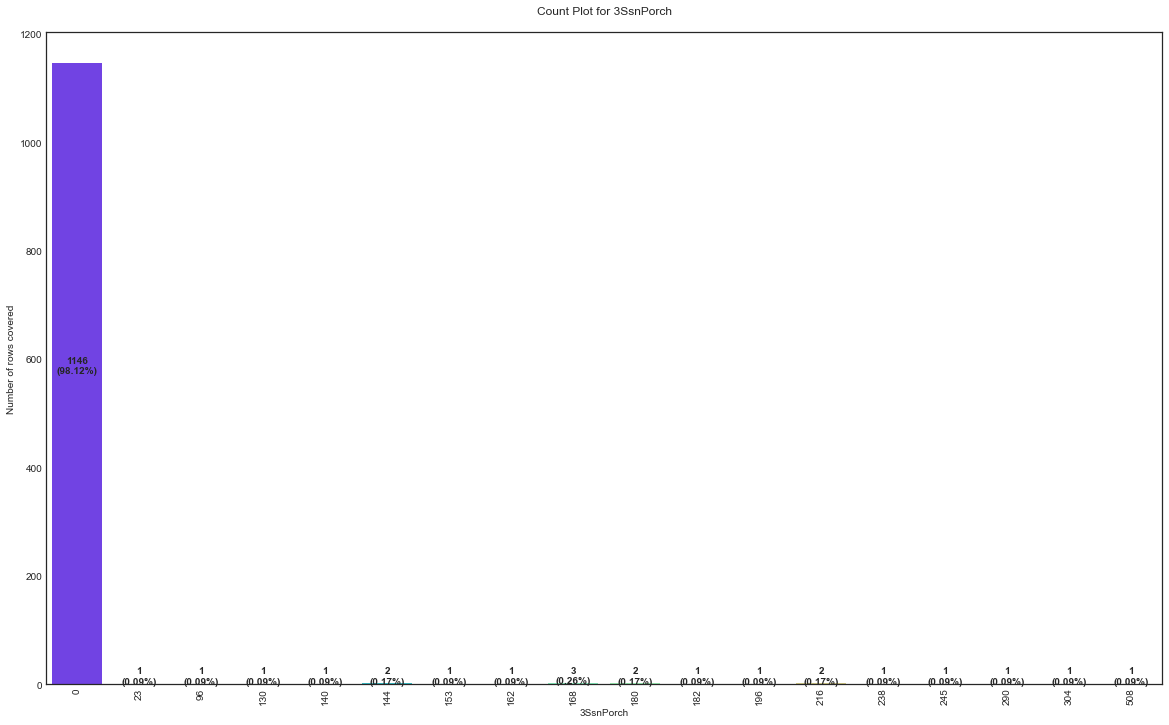

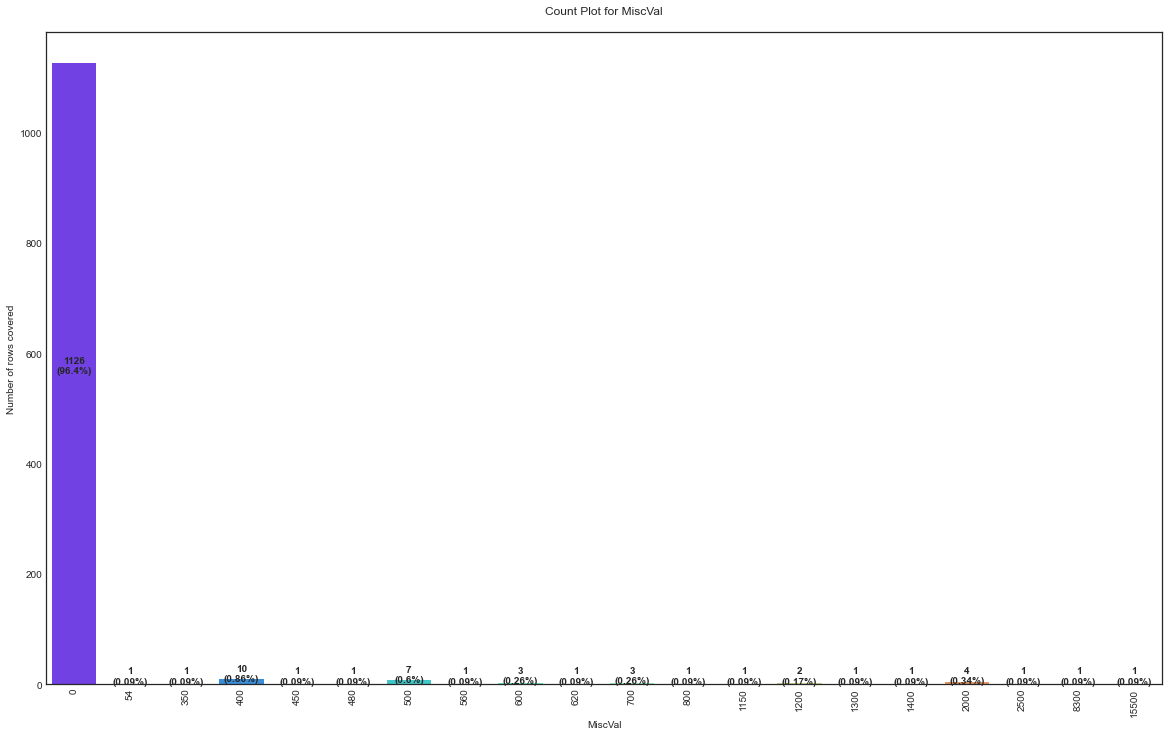

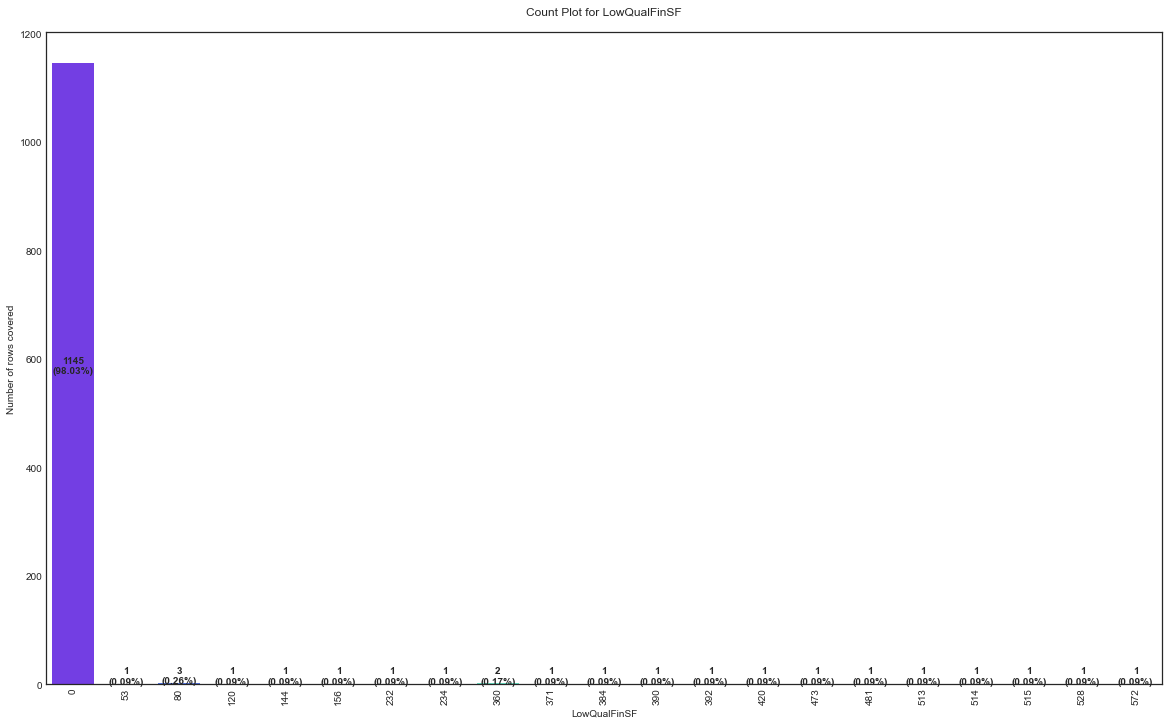

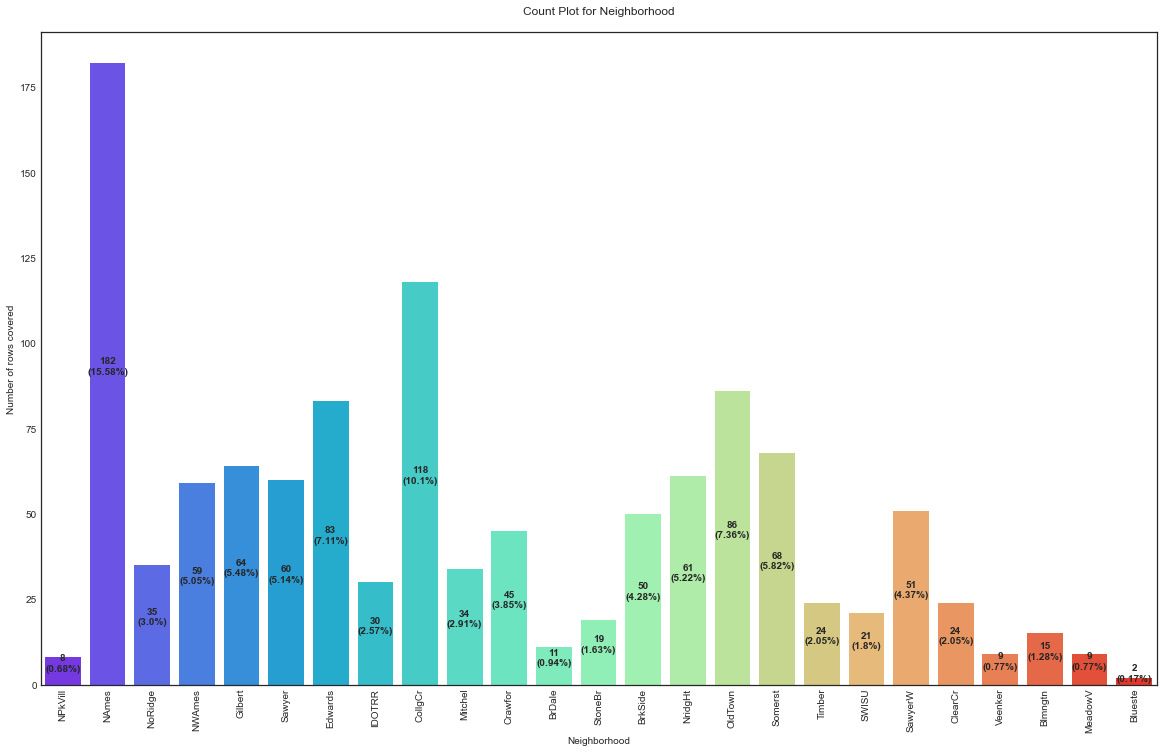

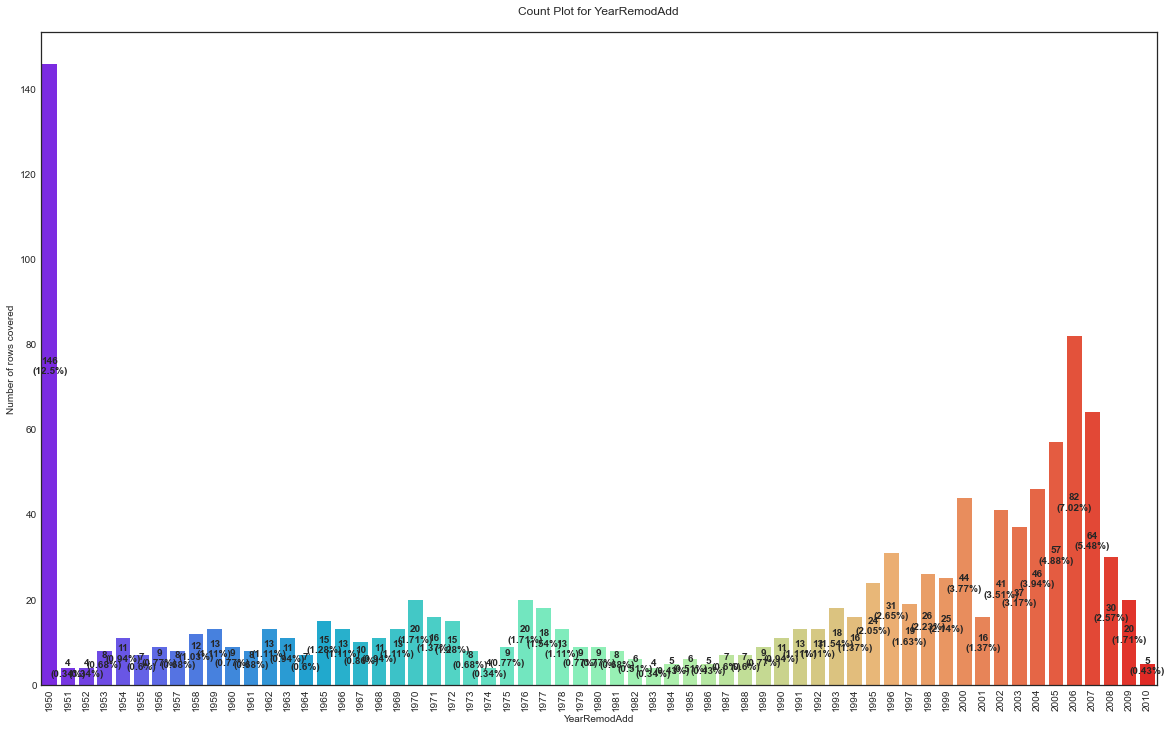

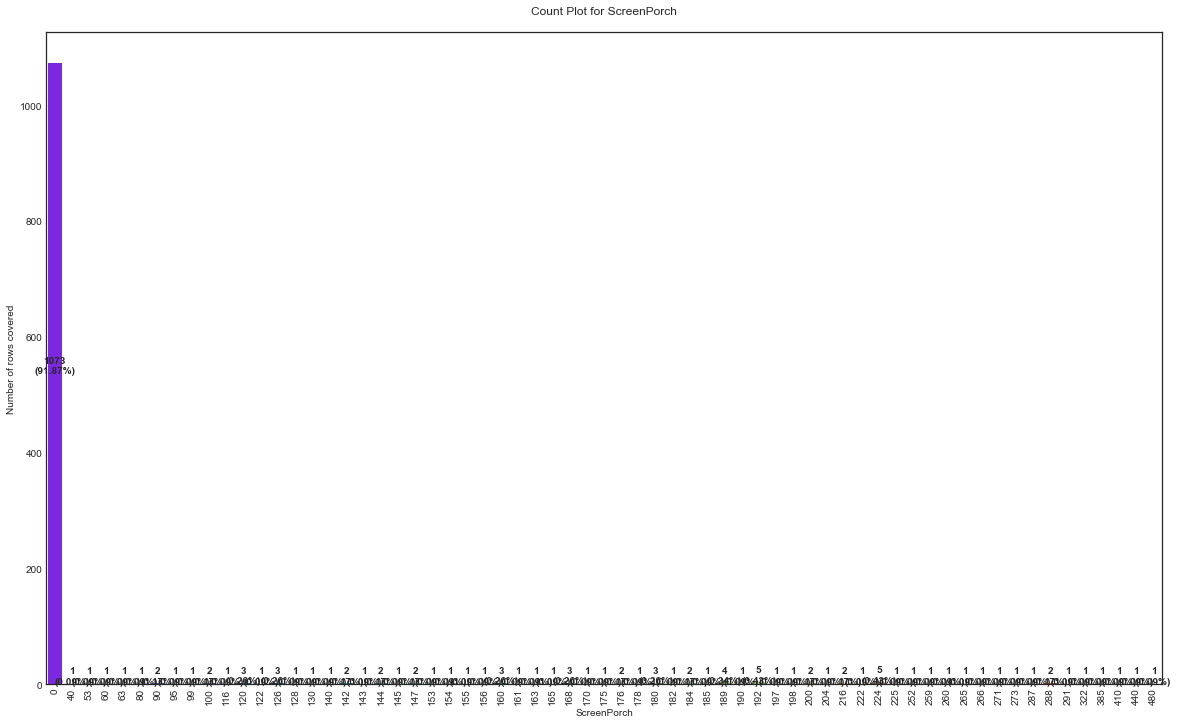

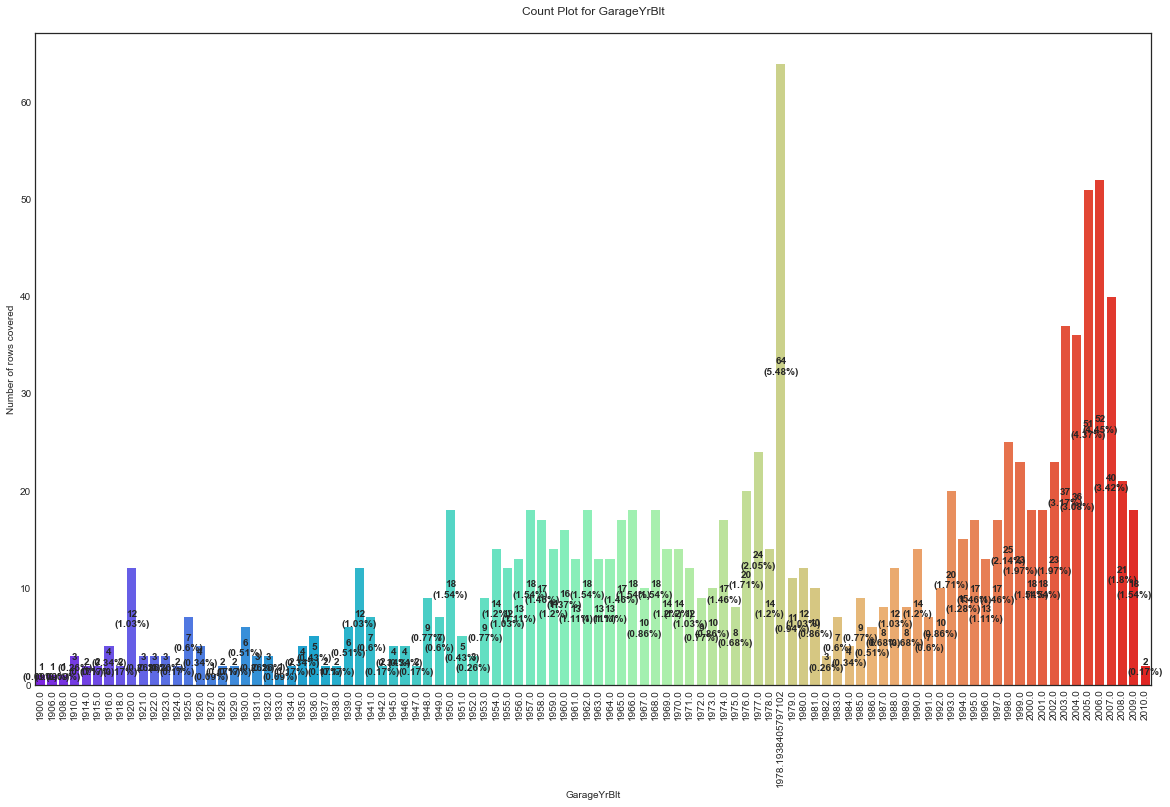

In [132]:
for col in train_df[double]:
    plt.figure(figsize=(20,12))
    col_name = col
    values = train_df[col_name].value_counts()
    index = 0
    ax = sns.countplot(train_df[col_name], palette="rainbow")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(train_df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

# Observations:


Scatter plot for EnclosedPorch column with respect to the rows covered ->


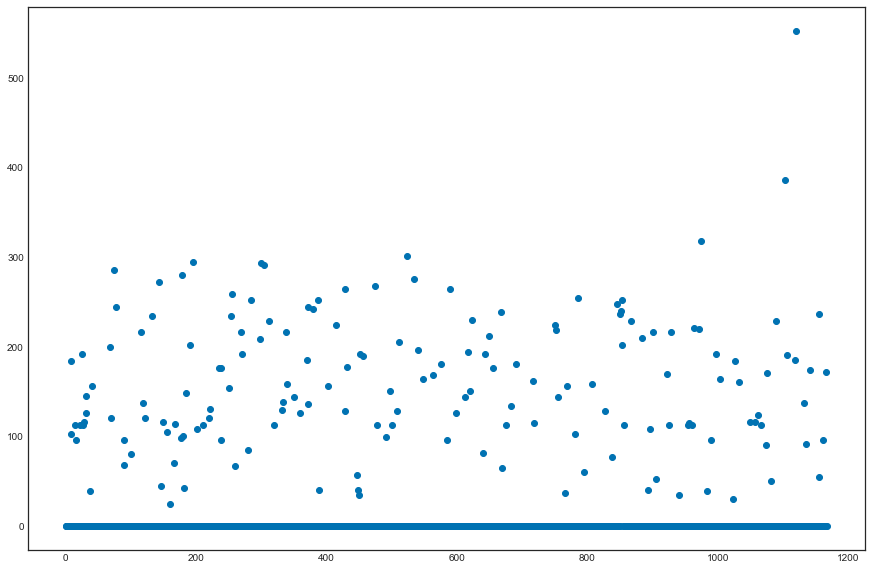

Scatter plot for LotFrontage column with respect to the rows covered ->


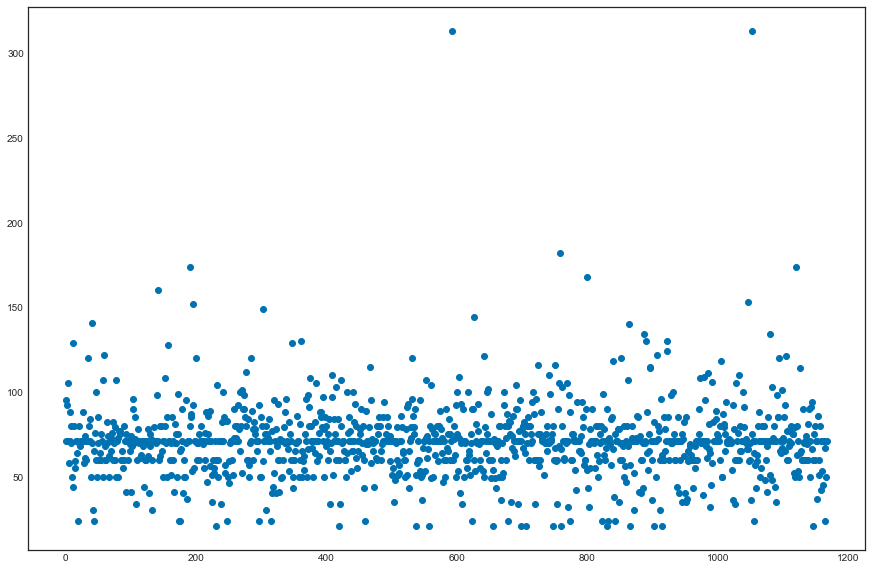

Scatter plot for YearBuilt column with respect to the rows covered ->


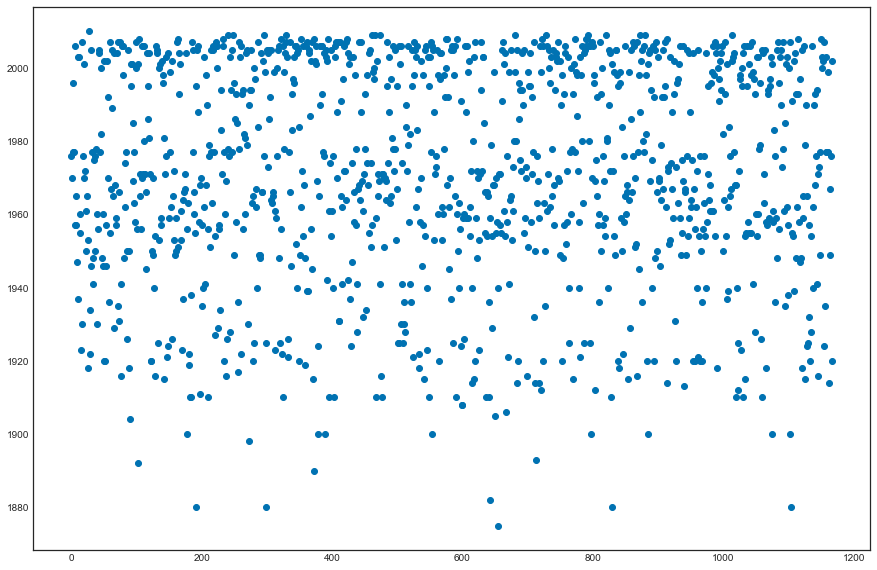

Scatter plot for BsmtFinSF2 column with respect to the rows covered ->


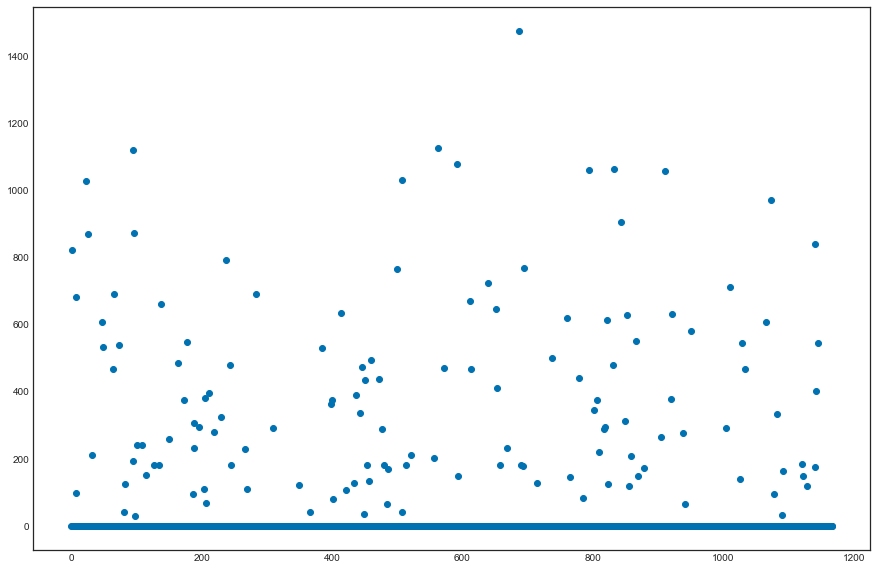

Scatter plot for OpenPorchSF column with respect to the rows covered ->


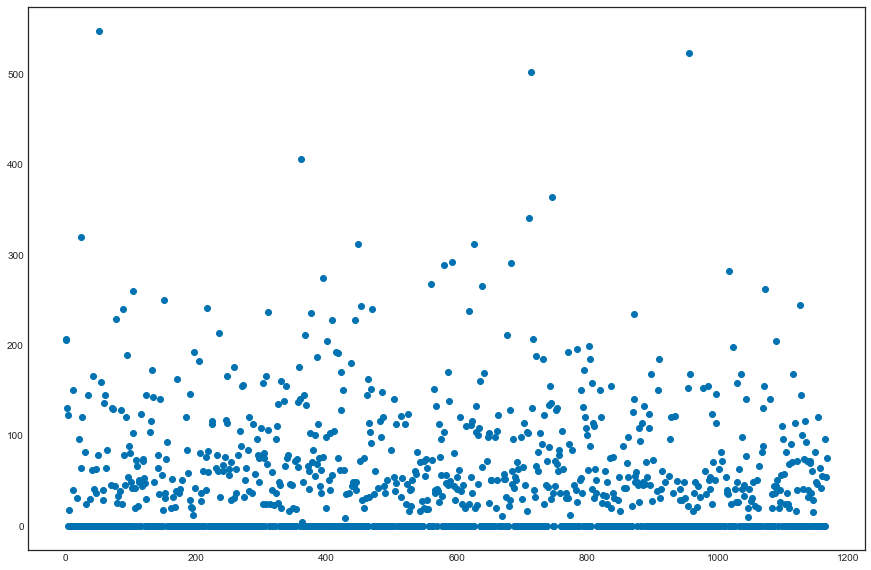

Scatter plot for WoodDeckSF column with respect to the rows covered ->


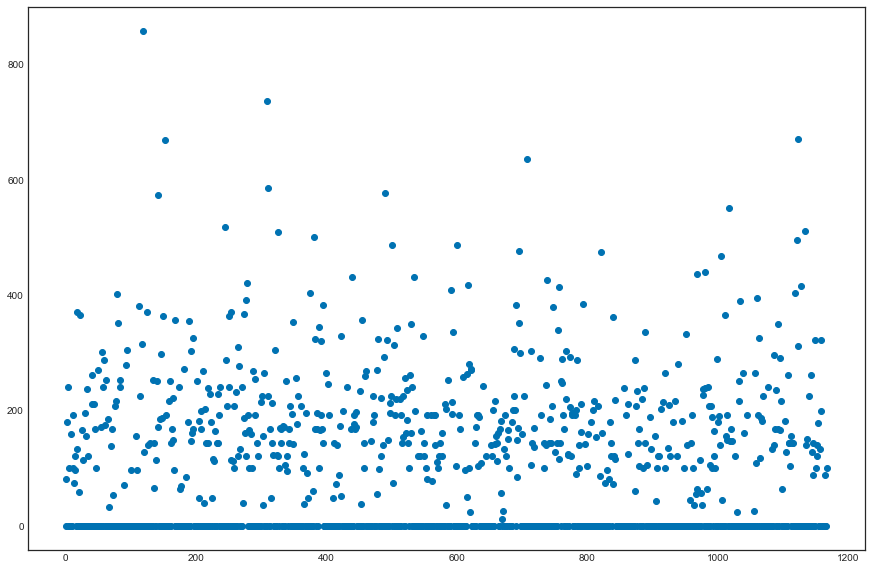

Scatter plot for MasVnrArea column with respect to the rows covered ->


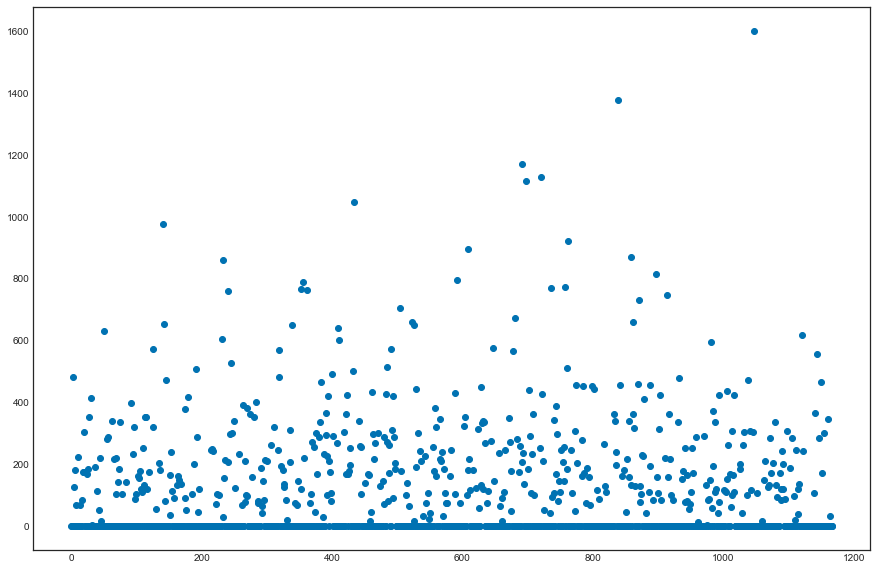

Scatter plot for 2ndFlrSF column with respect to the rows covered ->


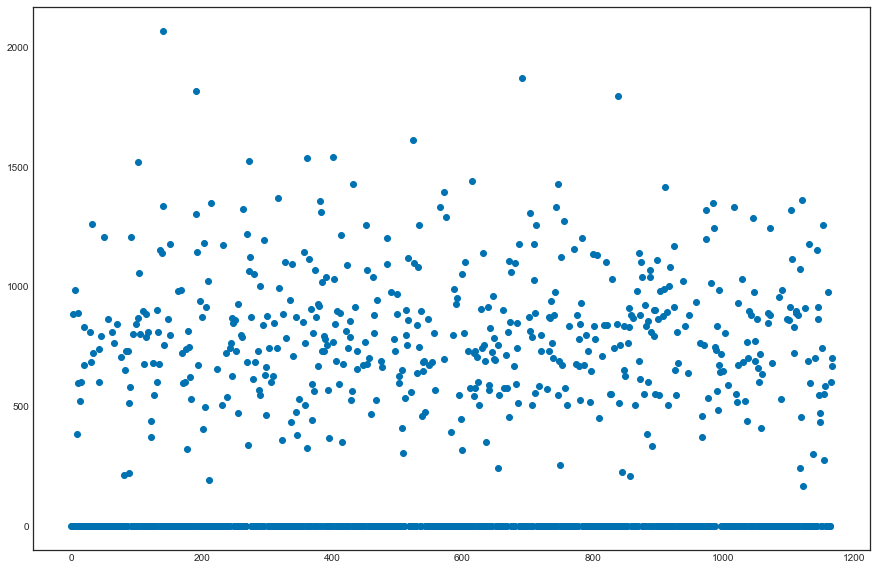

Scatter plot for GarageArea column with respect to the rows covered ->


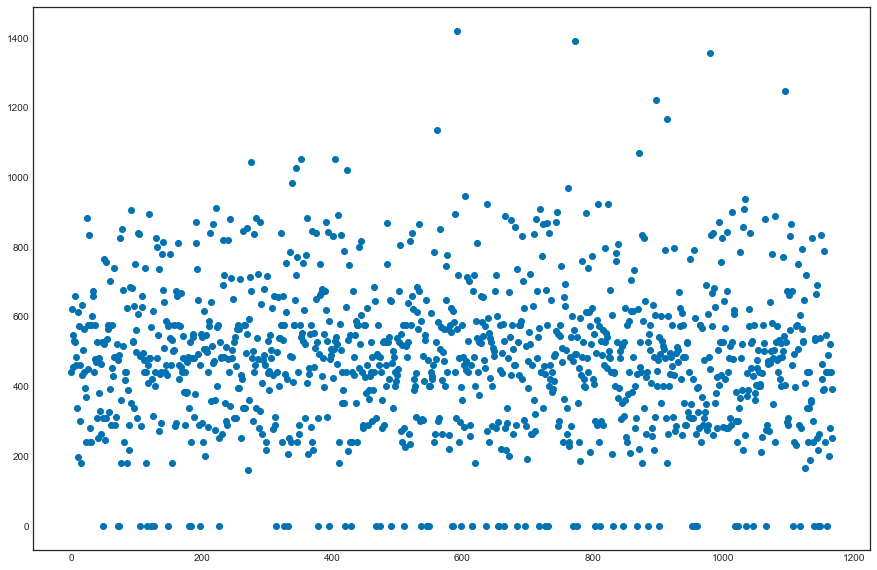

Scatter plot for BsmtFinSF1 column with respect to the rows covered ->


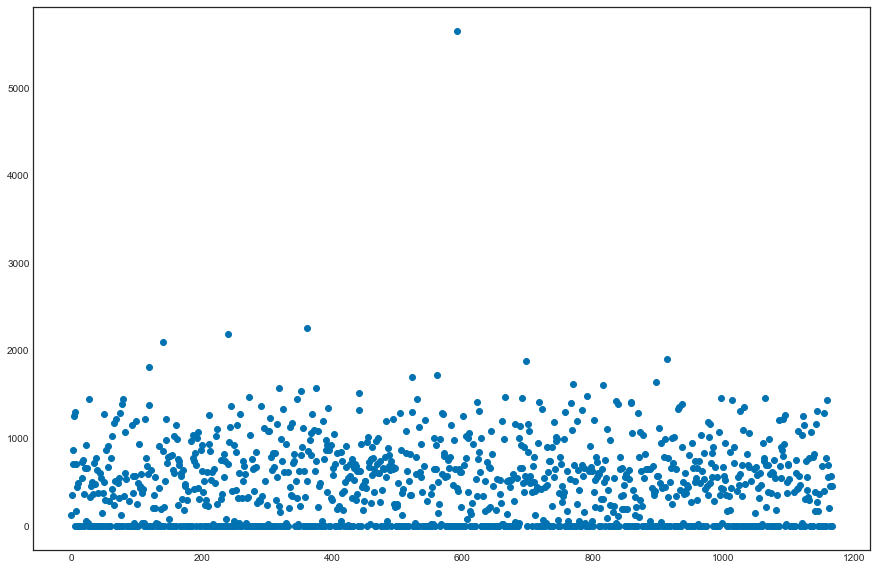

Scatter plot for SalePrice column with respect to the rows covered ->


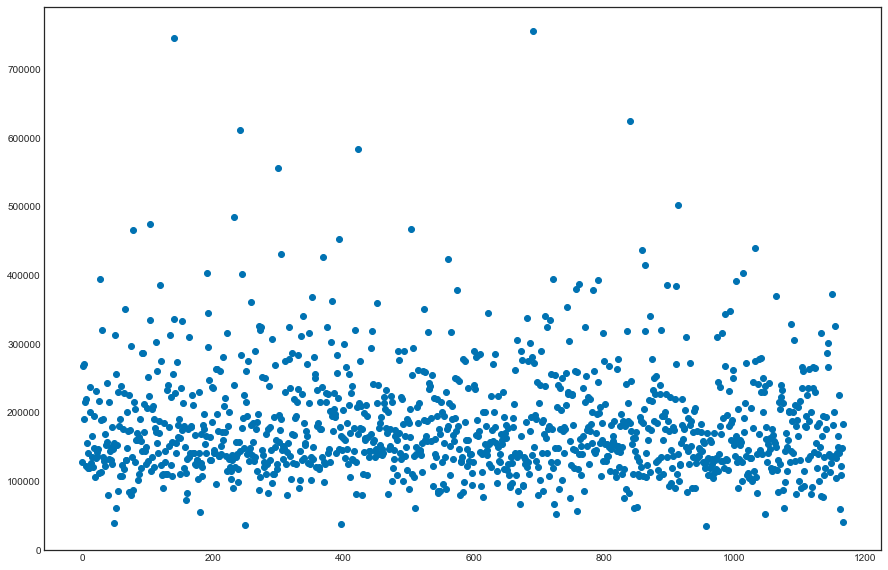

Scatter plot for TotalBsmtSF column with respect to the rows covered ->


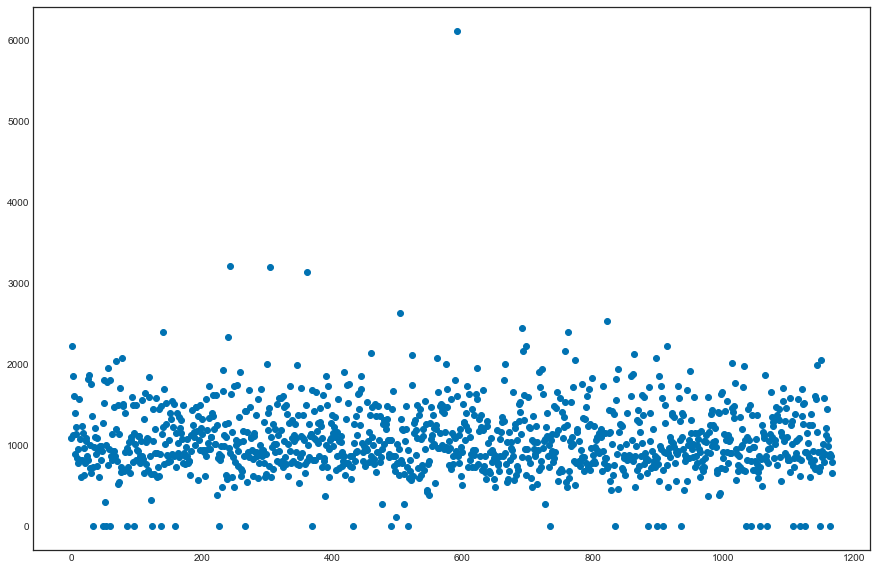

Scatter plot for 1stFlrSF column with respect to the rows covered ->


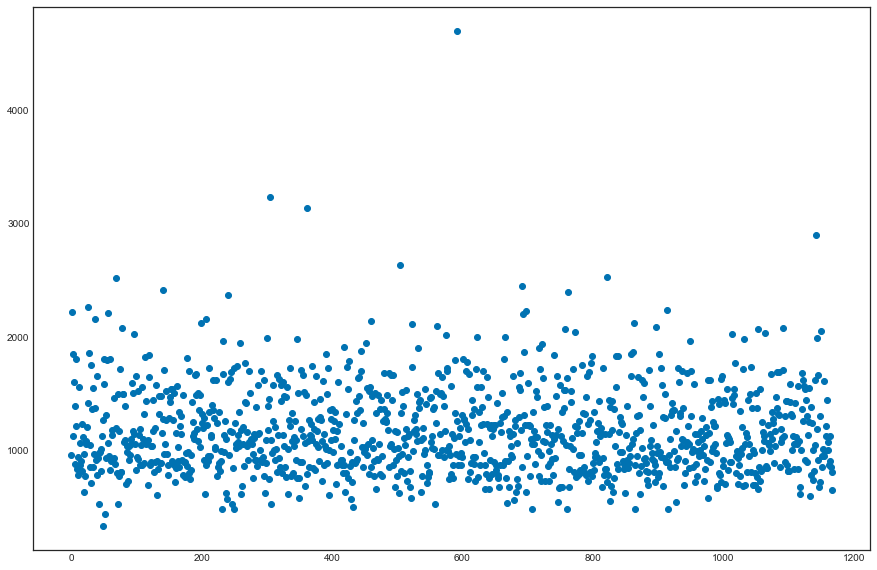

Scatter plot for BsmtUnfSF column with respect to the rows covered ->


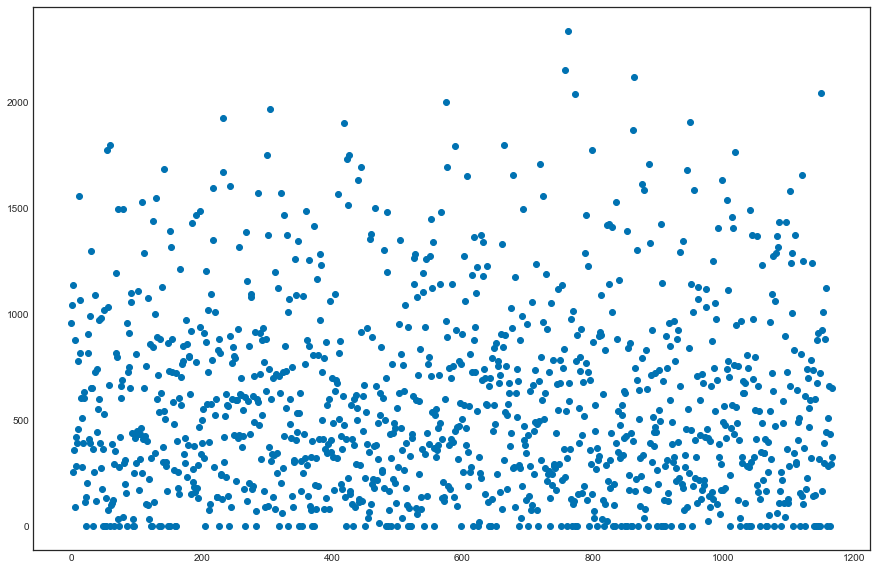

Scatter plot for GrLivArea column with respect to the rows covered ->


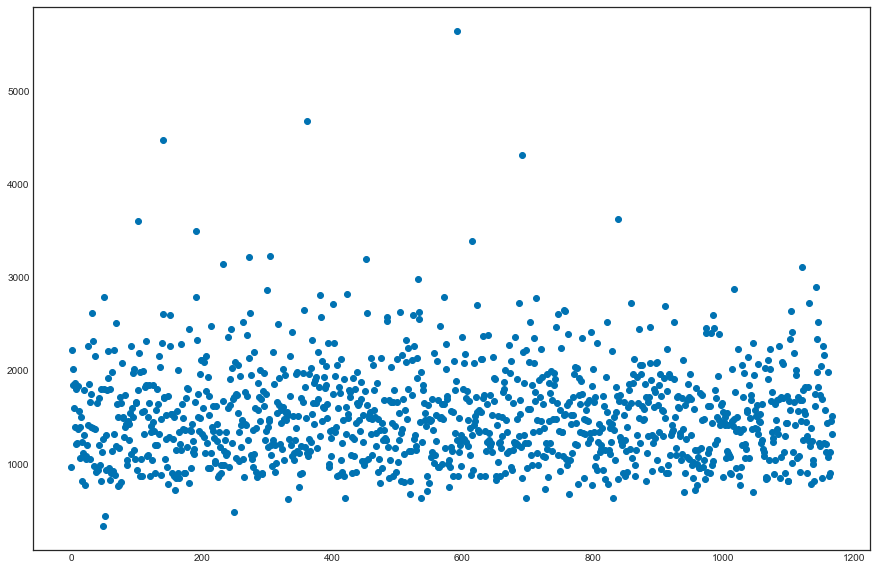

Scatter plot for LotArea column with respect to the rows covered ->


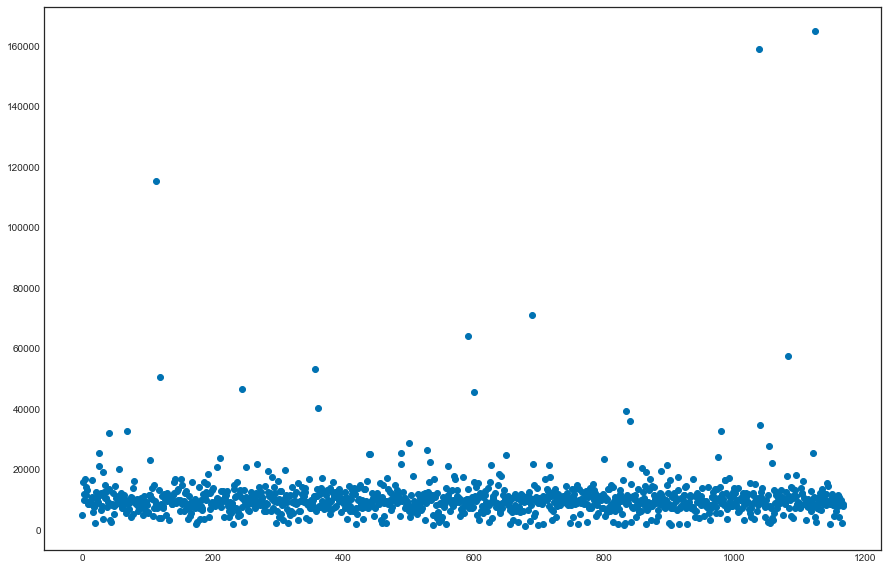

In [133]:
plt.style.use('seaborn-colorblind')
for j in train_df[triple]:
    plt.figure(figsize=(15,10))
    print(f"Scatter plot for {j} column with respect to the rows covered ->")
    plt.scatter(train_df.index, train_df[j])
    plt.show()

# Observations:


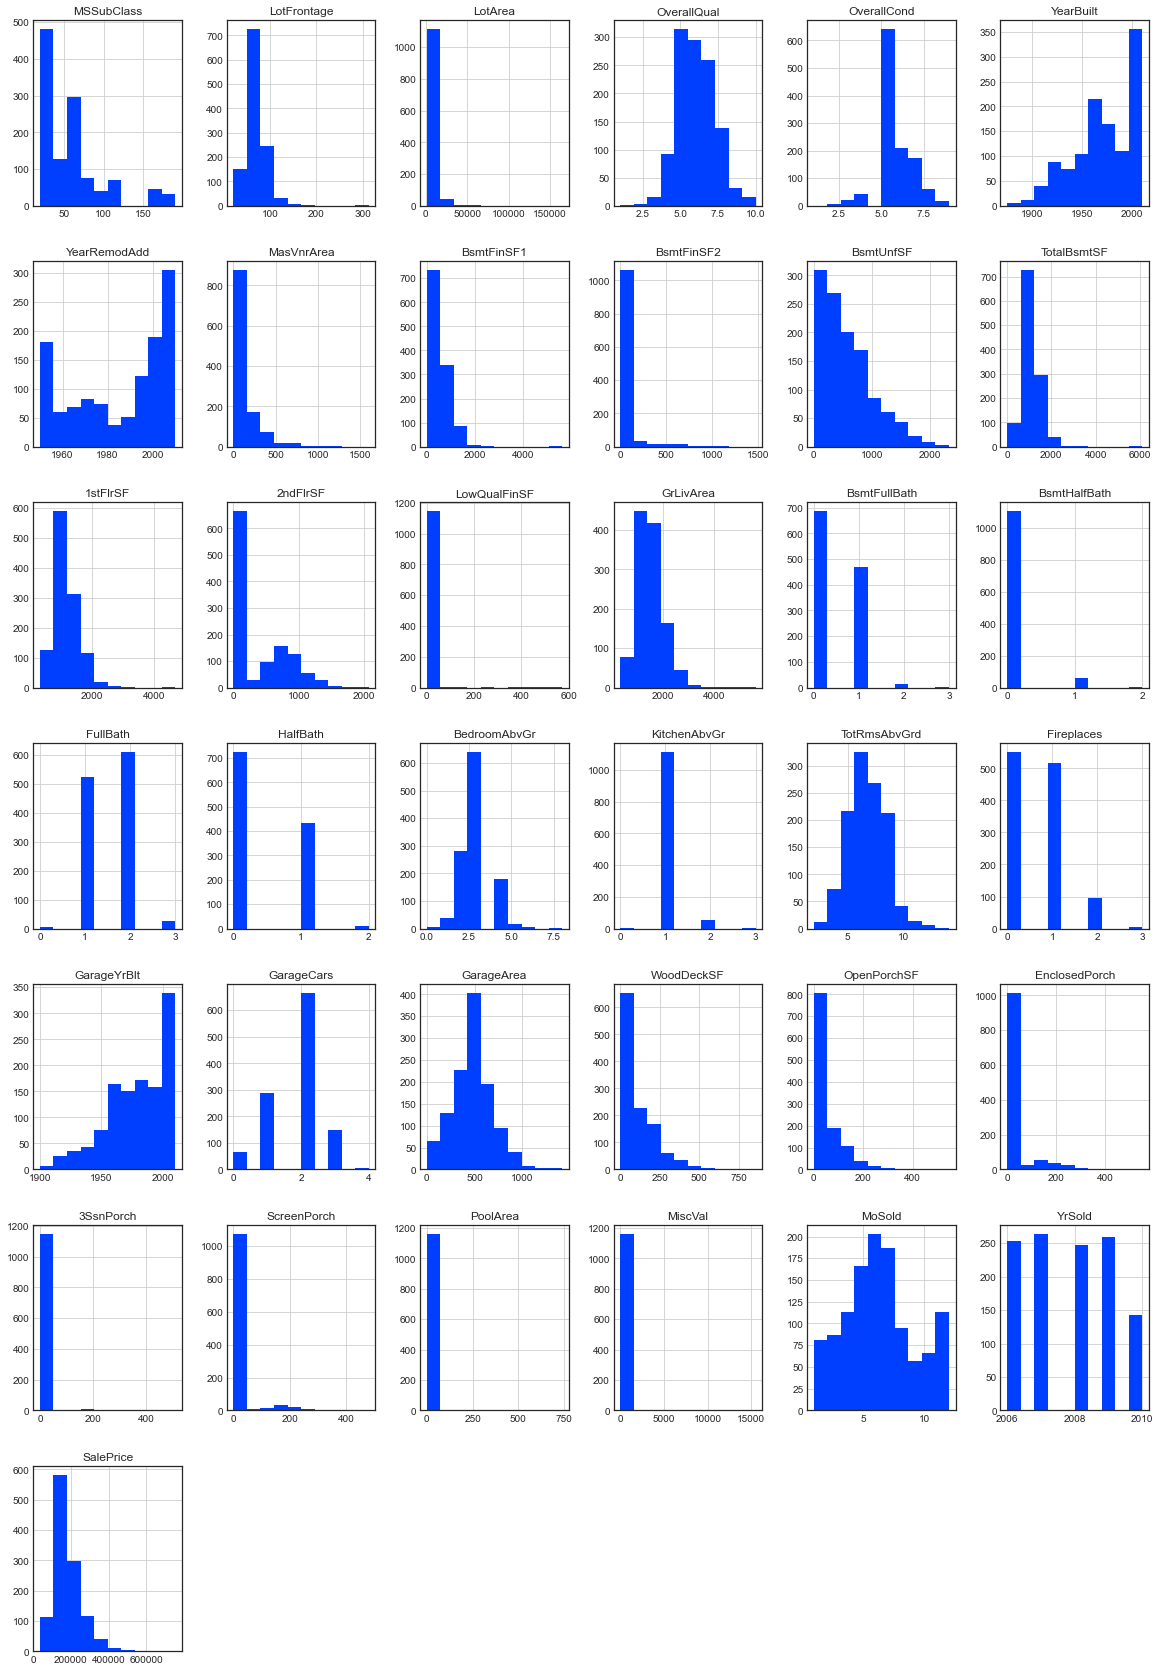

In [134]:
plt.style.use('seaborn-bright')

train_df.hist(figsize=(20,30))
plt.show()

# Observations:


## Visualizations of independant Variables with respect to Target


In [135]:
train_df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

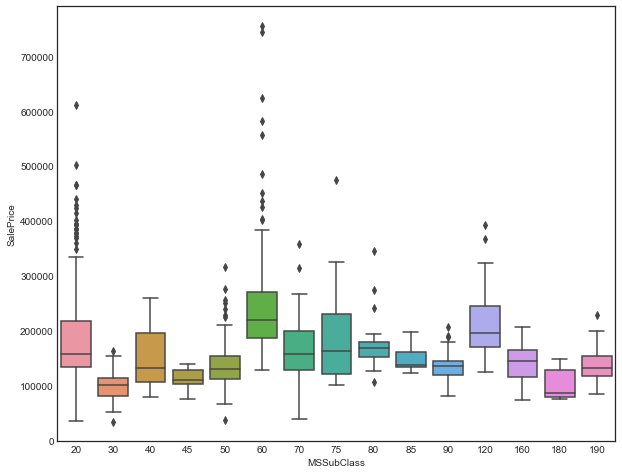

In [136]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=train_df.sort_values('SalePrice',ascending=False))
plt.show()

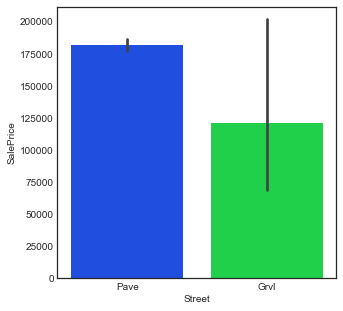

In [137]:
# Checking for the sale price on the basis of road access to the property

plt.figure(figsize=[5,5])
sns.barplot(x='Street', y='SalePrice', data = train_df.sort_values('SalePrice', ascending=False))
plt.show()

we can observe that the property with the road access of Pave is in more demand and so its price is also high.



<Figure size 576x288 with 0 Axes>

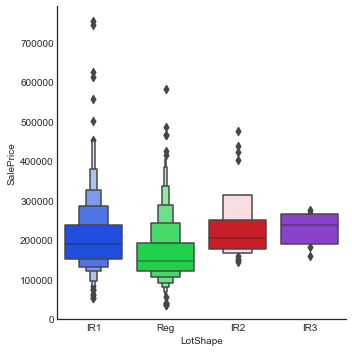

In [138]:
# Checking the relation of property shape on the sale price
plt.figure(figsize=[8,4])
sns.catplot(x='LotShape', y='SalePrice', data=train_df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

<Figure size 576x288 with 0 Axes>

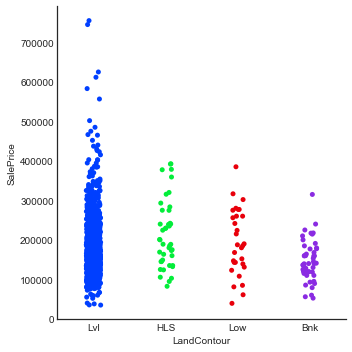

In [139]:
# Let's check for the effect of flatness of the property on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LandContour', y='SalePrice', data=train_df.sort_values('SalePrice', ascending=False))

<Figure size 432x288 with 0 Axes>

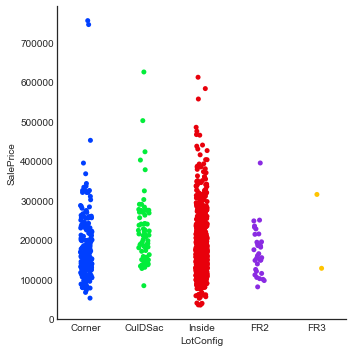

In [140]:
# Checking for the lot configuration and its effect on the sale pricing.
plt.figure(figsize=[6,4])
sns.catplot(x='LotConfig', y='SalePrice', data=train_df.sort_values('SalePrice', ascending=False))

<Figure size 576x432 with 0 Axes>

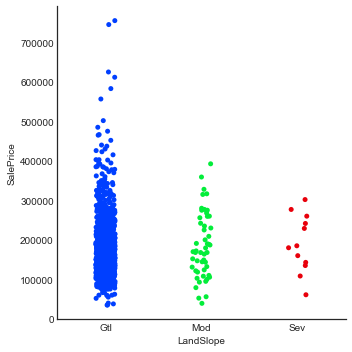

In [141]:
# Cheecking for the slope wise sale pricing of the properties
plt.figure(figsize=[8,6])
sns.catplot(x='LandSlope', y='SalePrice', data=train_df.sort_values('SalePrice', ascending=False))

The maximum gentle slope type properties having the sale price ranging between 100000 to 300000.



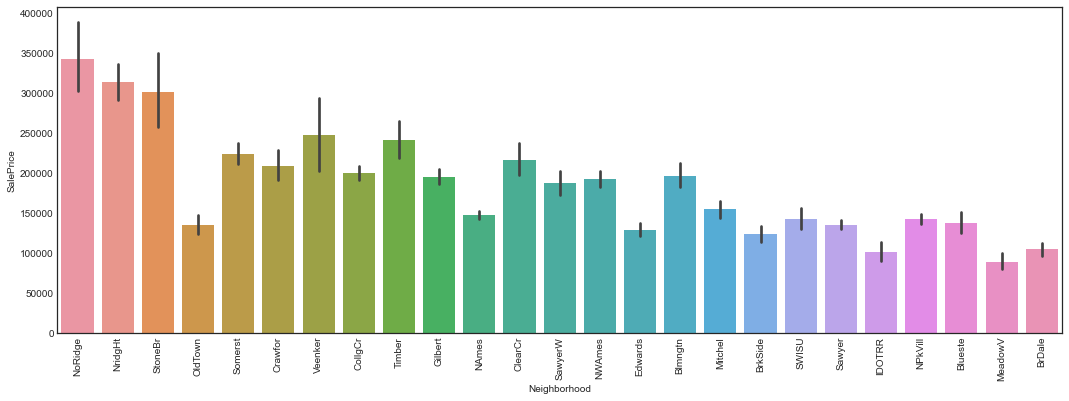

In [142]:
# Checking for the effect of physical locations within Ames city limits on the sale price
plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= train_df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

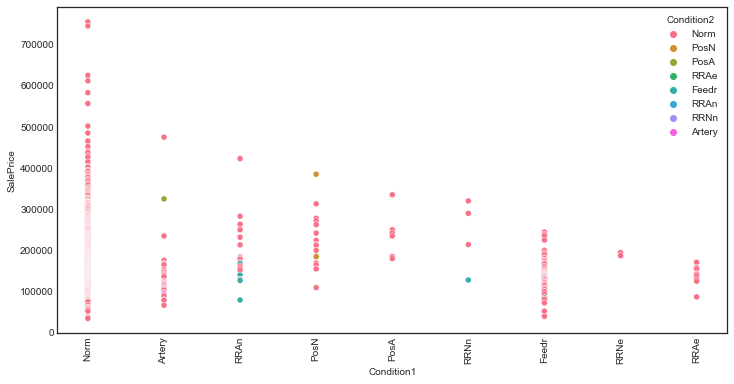

In [143]:
# Checking for the sale pricing proximity wise
plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=train_df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

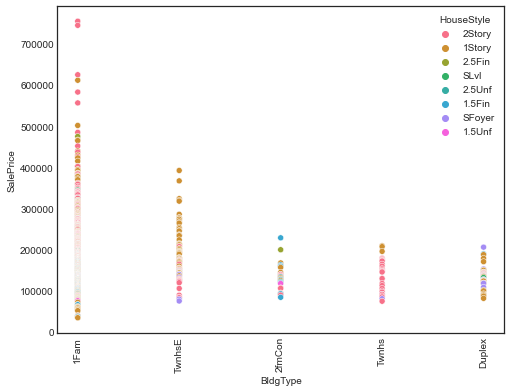

In [144]:
# Let's check for the type & style of dwelling
plt.figure(figsize=[8,6])
sns.scatterplot(x= 'BldgType', y='SalePrice', hue = 'HouseStyle', data = train_df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation = 90)
plt.show()

<Figure size 576x432 with 0 Axes>

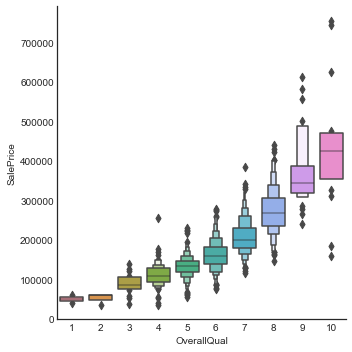

In [145]:
# Let's check for the saleprices based on the ratings of overall material and finish of the house
plt.figure(figsize=[8,6])
sns.catplot(x='OverallQual', y='SalePrice', data = train_df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

We can see that as the ratings are increasing the price of the property is also increasing.



<Figure size 576x432 with 0 Axes>

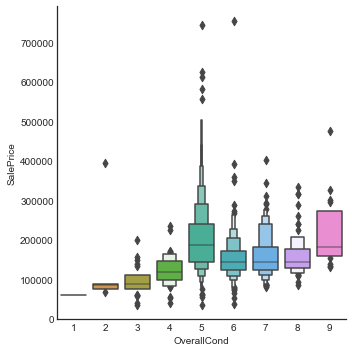

In [146]:
# Let's check for the saleprices based on the ratings of overall condition of the house
plt.figure(figsize=[8,6])
sns.catplot(x='OverallCond', y='SalePrice', data = train_df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

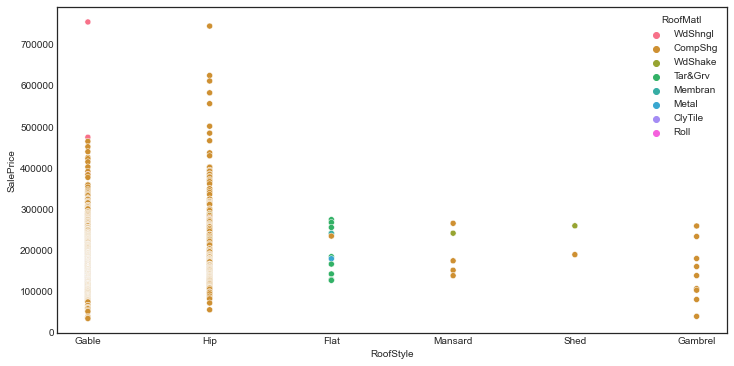

In [147]:
# Let's check for the effect of roof on the sale price
plt.figure(figsize=[12,6])
sns.scatterplot(x='RoofStyle', y='SalePrice', hue = 'RoofMatl', data = train_df.sort_values('SalePrice', ascending=False))
plt.show()

The highest price of the house having Gable roof type and the material of the roof is Wood Shingles.



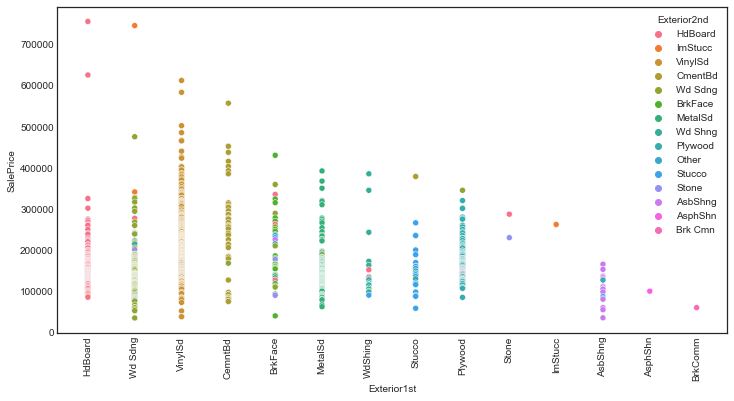

In [148]:
# Let's check for the exterior covering on the house and its effect on the sale price
plt.figure(figsize=[12,6])
sns.scatterplot(x='Exterior1st', y='SalePrice', hue = 'Exterior2nd', data = train_df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

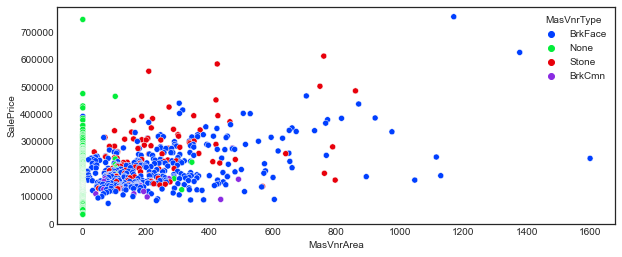

In [149]:
# Let's check for the sale price based on the masonry veneer
plt.figure(figsize=[10,4])
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue = 'MasVnrType', data = train_df.sort_values('SalePrice', ascending=False))

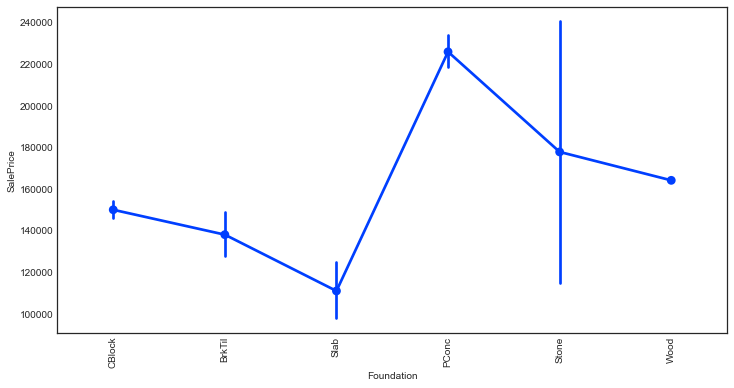

In [150]:
# Let's check for the effect of foundation on the sale price
plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=train_df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

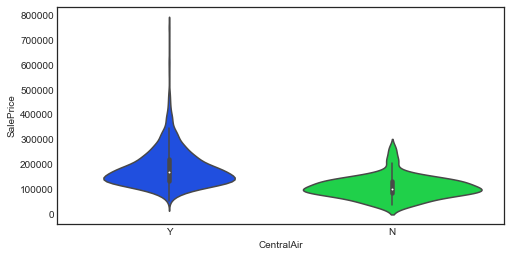

In [151]:
# Checking for the price of the houses on the basis of air conditioning
plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=train_df.sort_values('SalePrice', ascending=False))
plt.show()


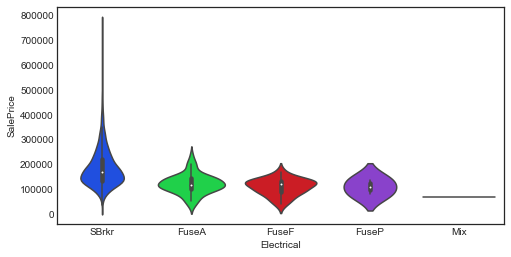

In [152]:
# Let's check for the electrical system of the house
plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=train_df.sort_values('SalePrice', ascending=False))
plt.show()


# Correlation using a Heatmap


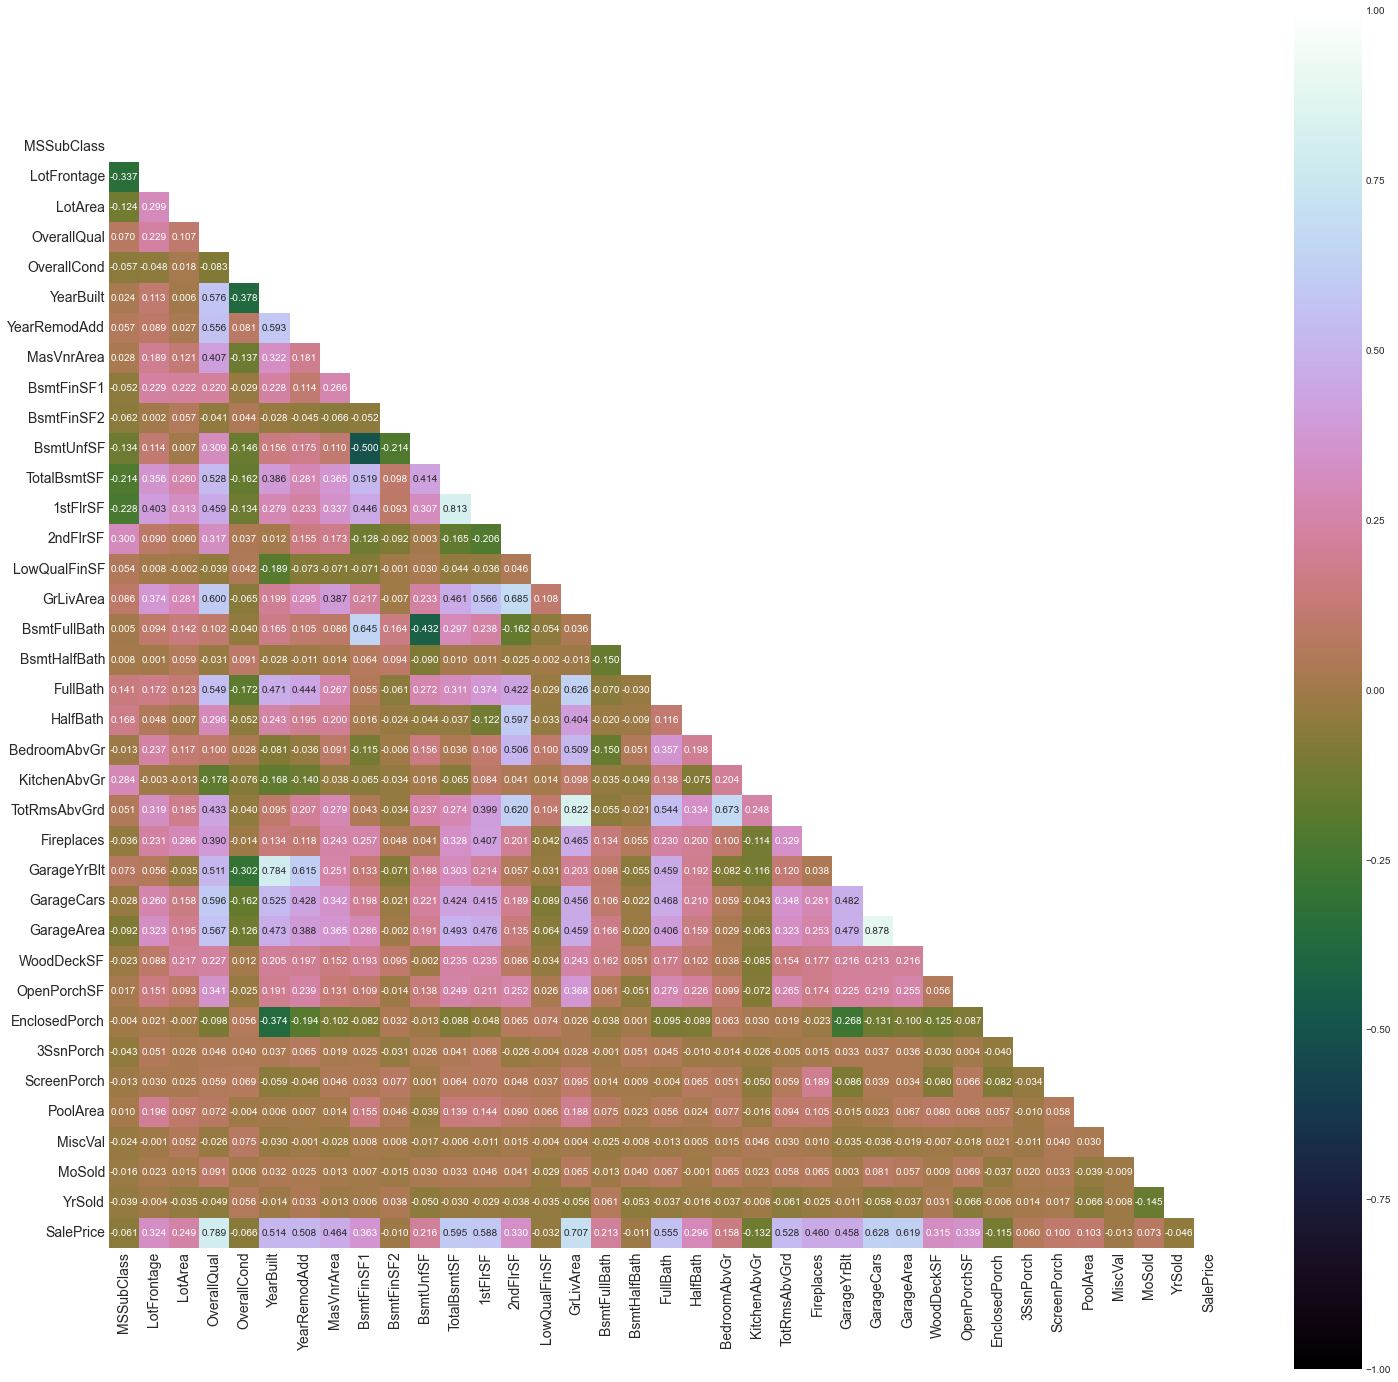

In [153]:
upper_triangle = np.triu(train_df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Observations:


'MSSubClass’,'OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'KitchenAbvGr’,'YrSold','EnclosedPorch','MiscVal' are negatively correlated with the target column, rest all are positively correlated.



'OverallQual' & 'GrLivArea' are highly positively correlated with target column.



'MSSubClass','OverallCond','OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column.



# Encoding the categorical object datatype columns


In [154]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(train_df, object_datatype)
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120       3.0     70.98847     4928     1.0       0.0          3.0   
1          20       3.0     95.00000    15865     1.0       0.0          3.0   
2          60       3.0     92.00000     9920     1.0       0.0          3.0   
3          20       3.0    105.00000    11751     1.0       0.0          3.0   
4          20       3.0     70.98847    16635     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        4.0        0.0          13.0         2.0         2.0       4.0   
1        4.0        1.0          12.0         2.0         2.0       0.0   
2        1.0        0.0          15.0         2.0         2.0       0.0   
3        4.0        0.0          14.0         2.0         2.0       0.0   
4        2.0        0.0          14.0         2.0         2.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            6            5       1976          1976        1.0   
1         2.0            8            6       1970          1970        0.0   
2         5.0            7            5       1996          1997        1.0   
3         2.0            6            6       1977          1977        3.0   
4         2.0            6            7       1977          2000        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       1.0          8.0          9.0         2.0         0.0        3.0   
1       5.0         12.0         13.0         2.0         0.0        2.0   
2       1.0          7.0          7.0         2.0         0.0        2.0   
3       1.0          8.0          9.0         1.0       480.0        3.0   
4       1.0          4.0          4.0         3.0       126.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        4.0         1.0       2.0       3.0           3.0           0.0   
1        2.0         2.0       3.0       1.0           1.0           0.0   
2        4.0         2.0       2.0       3.0           0.0           2.0   
3        4.0         1.0       2.0       3.0           3.0           1.0   
4        4.0         1.0       2.0       3.0           3.0           0.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         120           5.0           0        958         1078      1.0   
1         351           4.0         823       1043         2217      1.0   
2         862           5.0           0        255         1117      1.0   
3         705           5.0           0       1139         1844      1.0   
4        1246           5.0           0        356         1602      1.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        4.0         1.0         4.0       958         0             0   
1        0.0         1.0         4.0      2217         0             0   
2        0.0         1.0         4.0      1127       886             0   
3        0.0         1.0         4.0      1844         0             0   
4        2.0         1.0         4.0      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          3.0             5         6.0           1   
1             1          2.0             8         6.0           1   
2             1          3.0             8         6.0           1   
3             1          3.0   

I defined a function to apply "OrdinalEncoder" on my feature columns to convert the object datatype columns to numeric format.



In [155]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))


Shape of our data frame post encoding shows 1168 Rows and 74 columns



Checking the number of rows and columns after applying the encoding technique on them.



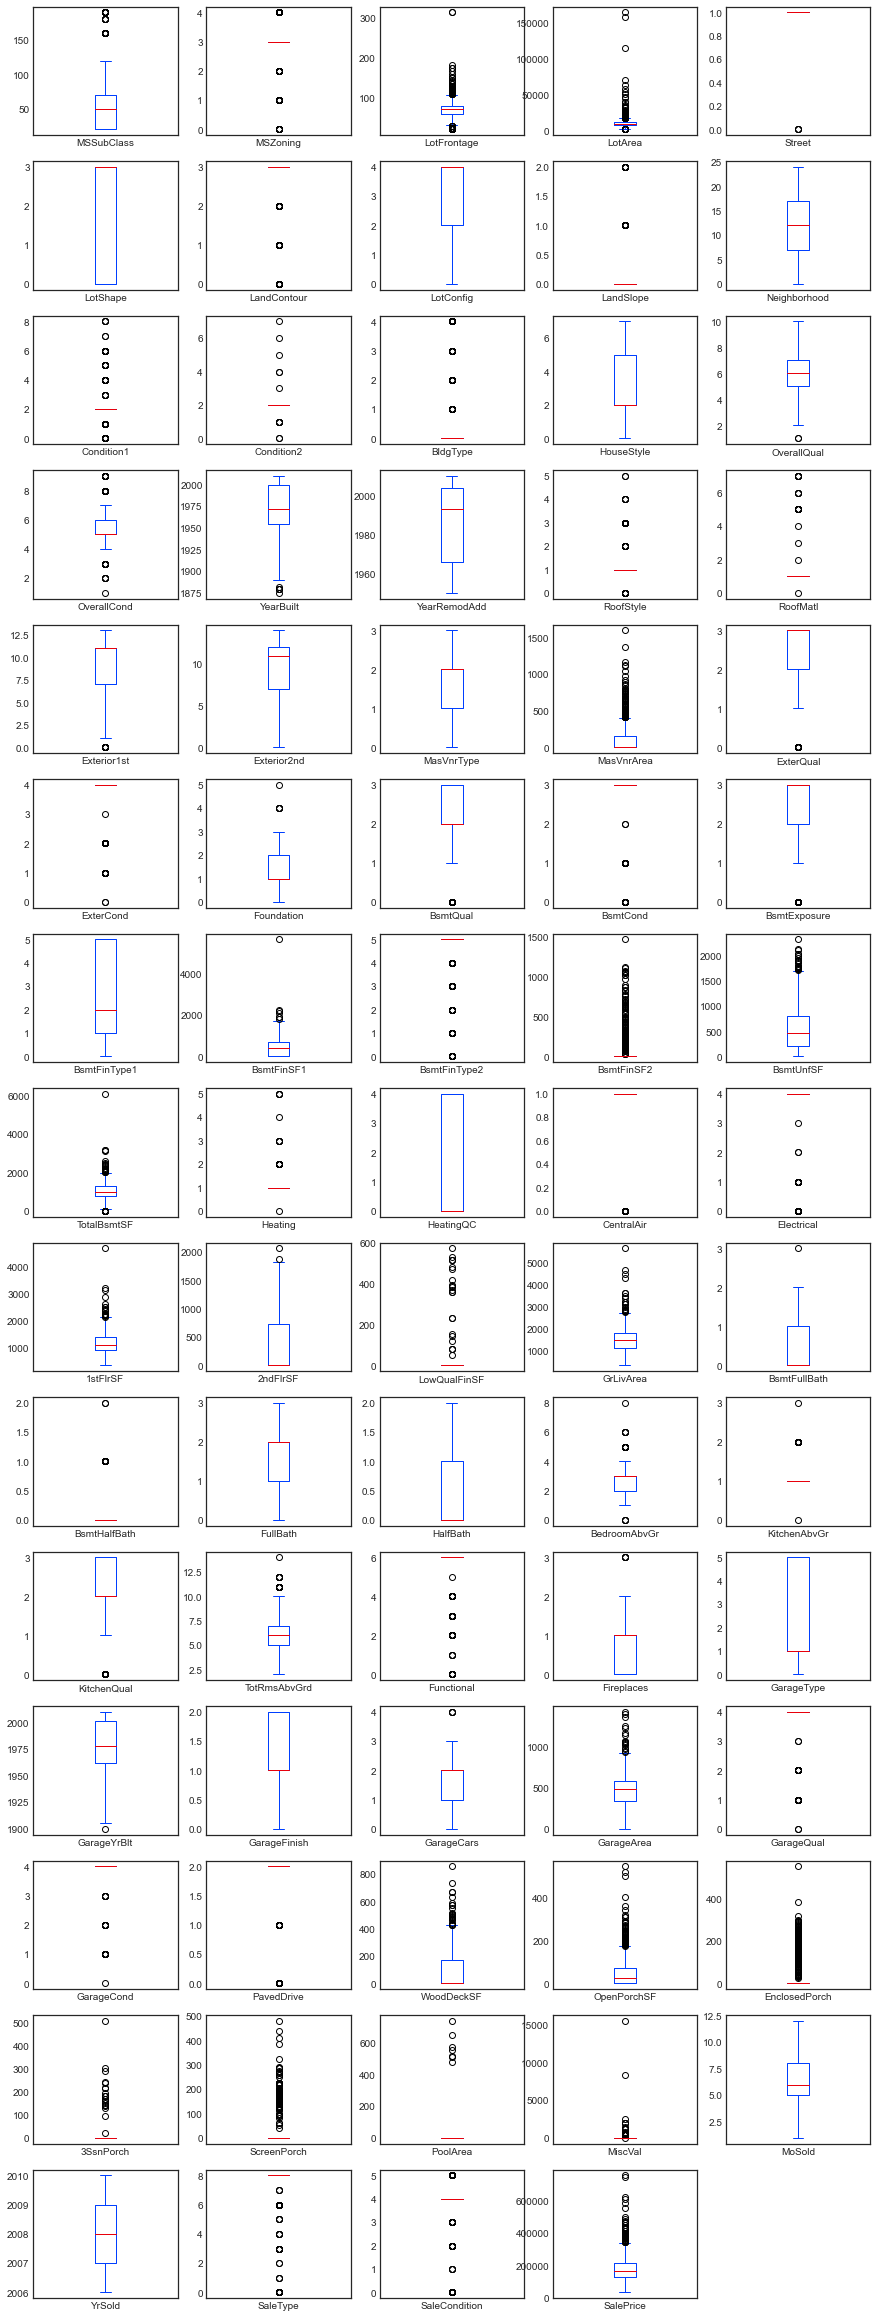

In [156]:
# Checking for the outliers
train_df.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

Using the box plot we are able to see the outliers details however when I tried to remove outliers I was losing around 58% of data and therefore I decided on retaining the information that I have left with me.



In [157]:
train_df.skew().sort_values()


Street          -17.021969
GarageCond       -5.422472
GarageQual       -4.582386
Functional       -3.999663
SaleType         -3.660513
BsmtFinType2     -3.615783
CentralAir       -3.475188
BsmtCond         -3.293554
PavedDrive       -3.274035
LandContour      -3.125982
Electrical       -3.104209
SaleCondition    -2.671829
ExterCond        -2.516219
ExterQual        -1.810843
MSZoning         -1.796785
KitchenQual      -1.408106
BsmtQual         -1.343781
BsmtExposure     -1.166987
LotConfig        -1.118821
GarageYrBlt      -0.662934
Exterior1st      -0.612816
LotShape         -0.603775
Exterior2nd      -0.592349
YearBuilt        -0.579204
YearRemodAdd     -0.495864
GarageFinish     -0.450190
GarageCars       -0.358556
MasVnrType       -0.104609
BsmtFinType1     -0.068901
Foundation       -0.002761
Neighborhood      0.043735
FullBath          0.057809
YrSold            0.115765
OverallQual       0.175082
GarageArea        0.189665
MoSold            0.220979
BedroomAbvGr      0.243855
H

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.



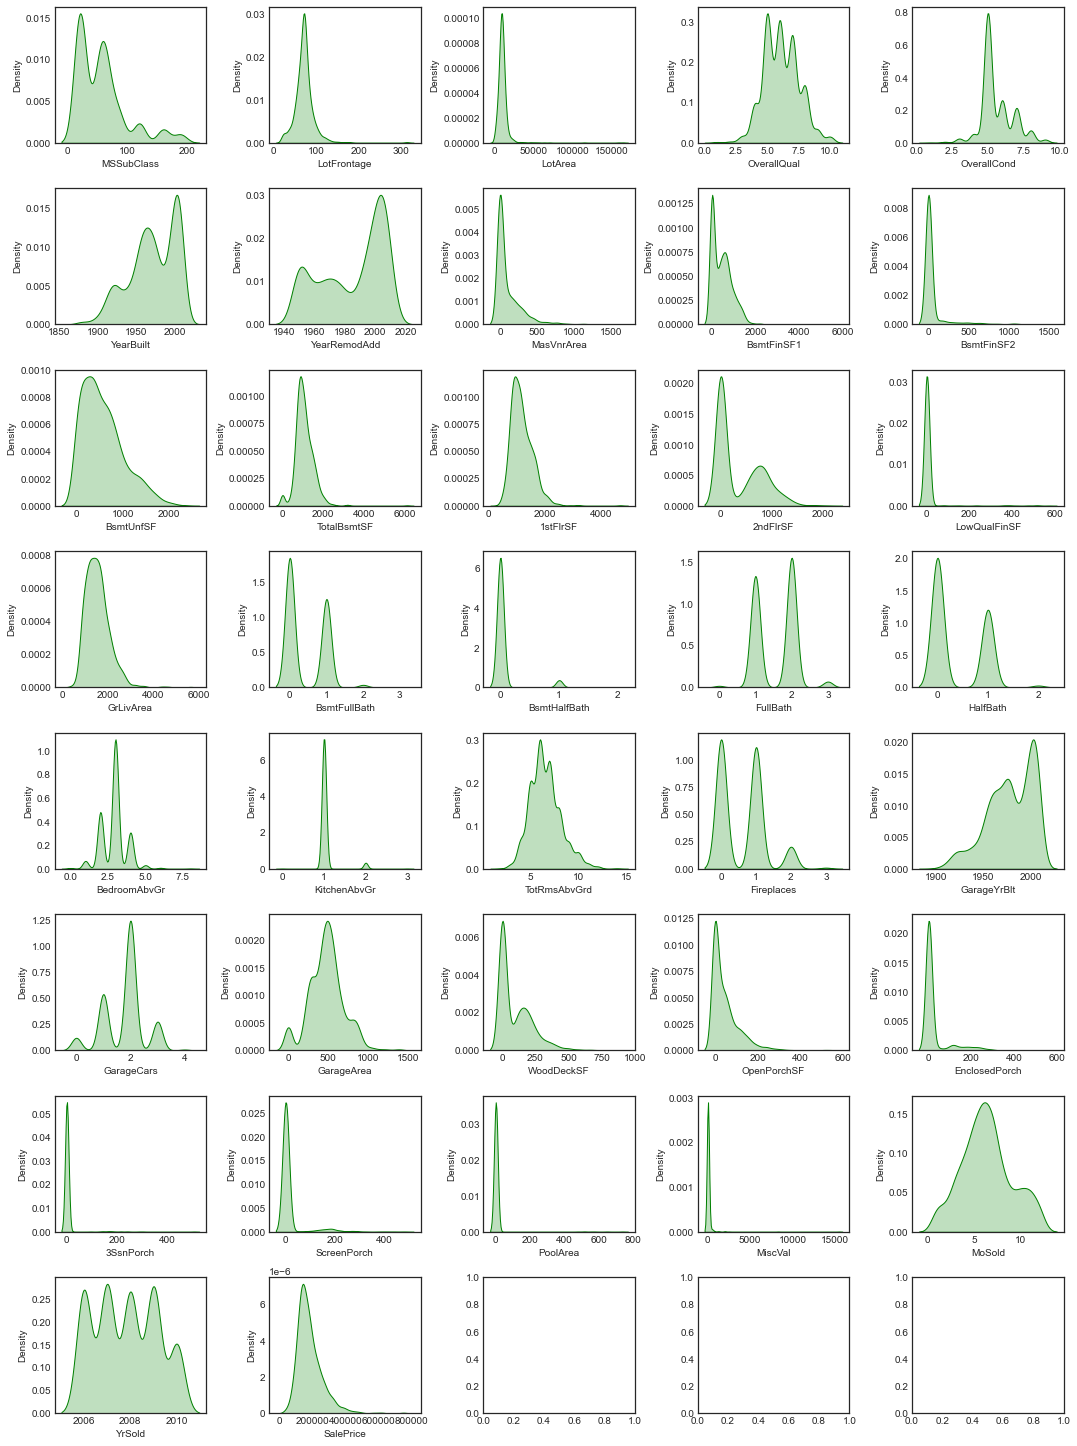

In [158]:
fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


Using the above distribution plot we are able to see some skewness present in a lot of the columns that will need to be handled.



# Correlation Bar Plot comparing features with our label


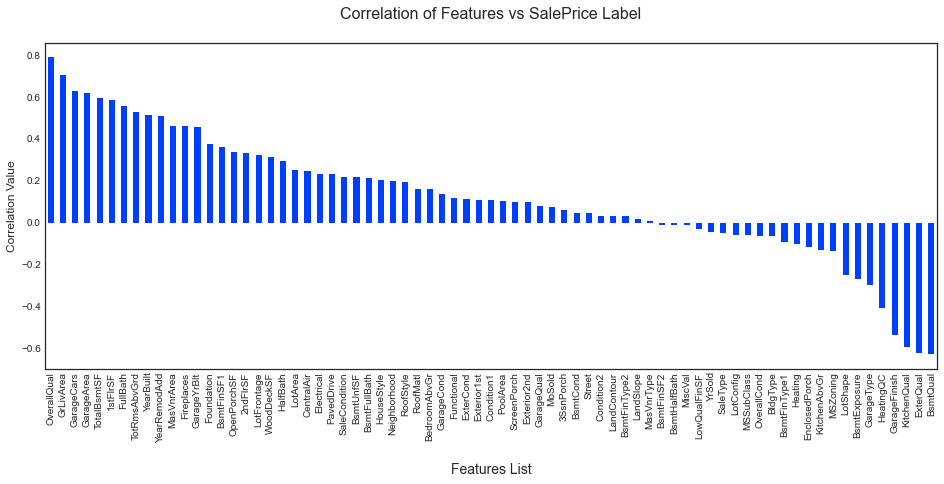

In [159]:
df_corr = df.corr()
plt.figure(figsize=(16,6))
df_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs SalePrice Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Observations:


SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.



SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.



# Removing Skewness using yeo-johnson method


In [160]:
# These are the numerical columns we will remove the skewness of all the numerical columns apart from "SalePrice" 
#'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'


In [161]:
df[numeric_datatype].skew()


MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [162]:
# Removing skewness using yeo-johnson method to get better prediction
skew = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [163]:
from sklearn.preprocessing import PowerTransformer
transf = PowerTransformer(method='yeo-johnson')

In [164]:
train_df[skew] = transf.fit_transform(train_df[skew].values)
train_df[skew].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    1.370435     0.093658 -1.213954    -0.052799    -0.496528   0.026859   
1   -1.167999     1.117135  1.100521     1.345826     0.407009  -0.185817   
2    0.490047     0.998803  0.158048     0.656375    -0.496528   0.836680   
3   -1.167999     1.495566  0.496002    -0.052799     0.407009   0.063582   
4   -1.167999     0.093658  1.196626    -0.052799     1.234321   0.063582   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.613054   -0.822734   -0.112649   -0.363019   0.903777     0.099335   
1     -0.854247   -0.822734    0.394677    2.756067   1.027313     2.374300   
2      0.495717   -0.822734    0.925416   -0.363019  -0.504500     0.185571   
3     -0.569998    1.382984    0.797133   -0.363019   1.160517     1.674462   
4      0.694762    1.138552    1.176115   -0.363019  -0.226633     1.200095   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.458345 -0.871745      -0.14173  -1.236502     -0.837006     -0.238775   
1  2.122554 -0.871745      -0.14173   1.295050      1.176812     -0.238775   
2  0.058641  1.176207      -0.14173   1.003880      1.176812     -0.238775   
3  1.574554 -0.871745      -0.14173   0.739356     -0.837006     -0.238775   
4  1.149105 -0.871745      -0.14173   0.314931     -0.837006      4.188040   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0   0.80229 -0.782707     -1.083459     -0.169259     -0.984125    0.777879   
1   0.80229 -0.782707      1.356214     -0.169259      0.943901    0.777879   
2   0.80229  1.268421      0.151784     -0.169259      0.943901    0.777879   
3   0.80229 -0.782707      0.151784     -0.169259      0.375729    0.777879   
4   0.80229 -0.782707      0.151784     -0.169259      0.943901    0.777879   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0    -0.219139    0.259753   -0.113082   -0.959773     1.409990   
1    -0.505658    0.259753    0.678810    0.781991     1.414498   
2     0.769650    0.259753   -0.045422    1.043999     1.198911   
3    -0.219139    0.259753    0.356726   -0.959773     1.169545   
4    -0.219139    0.259753    0.282610    1.135369    -1.061392   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133 -1.719437   
1      -0.411301  -0.138554     3.360787 -0.077648 -0.193133  1.320612   
2      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133 -0.076750   
3      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133 -2.209015   
4      -0.411301  -0.138554    -0.297551 -0.077648 -0.193133 -0.076750   

     YrSold  
0 -0.604806  
1 -0.604806  
2 -0.604806  
3  1.649761  
4  0.899576

In [165]:
train_df.head(3)


MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    1.370435       3.0     0.093658 -1.213954     1.0       0.0          3.0   
1   -1.167999       3.0     1.117135  1.100521     1.0       0.0          3.0   
2    0.490047       3.0     0.998803  0.158048     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        4.0        0.0          13.0         2.0         2.0       4.0   
1        4.0        1.0          12.0         2.0         2.0       0.0   
2        1.0        0.0          15.0         2.0         2.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0    -0.052799    -0.496528   0.026859     -0.613054        1.0   
1         2.0     1.345826     0.407009  -0.185817     -0.854247        0.0   
2         5.0     0.656375    -0.496528   0.836680      0.495717        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       1.0          8.0          9.0         2.0   -0.822734        3.0   
1       5.0         12.0         13.0         2.0   -0.822734        2.0   
2       1.0          7.0          7.0         2.0   -0.822734        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        4.0         1.0       2.0       3.0           3.0           0.0   
1        2.0         2.0       3.0       1.0           1.0           0.0   
2        4.0         2.0       2.0       3.0           0.0           2.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0   -0.112649           5.0   -0.363019   0.903777     0.099335      1.0   
1    0.394677           4.0    2.756067   1.027313     2.374300      1.0   
2    0.925416           5.0   -0.363019  -0.504500     0.185571      1.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        4.0         1.0         4.0 -0.458345 -0.871745      -0.14173   
1        0.0         1.0         4.0  2.122554 -0.871745      -0.14173   
2        0.0         1.0         4.0  0.058641  1.176207      -0.14173   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0  -1.236502     -0.837006     -0.238775   0.80229 -0.782707     -1.083459   
1   1.295050      1.176812     -0.238775   0.80229 -0.782707      1.356214   
2   1.003880      1.176812     -0.238775   0.80229  1.268421      0.151784   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0     -0.169259          3.0     -0.984125         6.0    0.777879   
1     -0.169259          2.0      0.943901         6.0    0.777879   
2     -0.169259          3.0      0.943901         6.0    0.777879   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0         1.0    -0.219139           1.0    0.259753   -0.113082         4.0   
1         1.0    -0.505658           2.0    0.259753    0.678810         4.0   
2         1.0     0.769650           2.0    0.259753   -0.045422         4.0   

   GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         4.0         2.0   -0.959773     1.409990      -0.411301  -0.138554   
1         4.0         2.0    0.781991     1.414498      -0.411301  -0.138554   
2         4.0         2.0    1.043999     1.198911      -0.411301  -0.138554   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SaleType  \
0    -0.297551 -0.077648 -0.193133 -1.719437 -0.604806       8.0   
1     3.360787 -0.077648 -0.193133  1.320612 -0.604806       8.0   
2    -0.297551 -0.077648 -0.193133 -0.076750 -0.604806       8.0   

   SaleCondition  SalePrice  
0            4.0     128000  
1            4.0     268000  
2            4.0     269790

In [166]:
# Checking skewness after using yeo-johnson method
train_df[skew].skew()


MSSubClass        0.064007
LotFrontage       0.161368
LotArea           0.032509
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
MasVnrArea        0.416370
BsmtFinSF1       -0.404528
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
1stFlrSF         -0.002391
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
BsmtFullBath      0.365488
BsmtHalfBath      3.954345
FullBath         -0.045944
HalfBath          0.498003
BedroomAbvGr      0.116498
KitchenAbvGr     -2.370593
TotRmsAbvGrd      0.002332
Fireplaces        0.084950
GarageYrBlt      -0.132523
GarageCars       -0.022970
GarageArea       -0.320370
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
MiscVal           4.991071
MoSold           -0.035838
YrSold            0.112893
dtype: float64

We can see using yeo-johnson method the skewness has been removed from majority of the columns. The rest would be ccategorically encoded columns which dont require skewness removal.



# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [167]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.



# Feature Scaling


In [168]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.370435 -0.021646     0.093658 -1.213954  0.058621 -1.373107   
1   -1.167999 -0.021646     1.117135  1.100521  0.058621 -1.373107   
2    0.490047 -0.021646     0.998803  0.158048  0.058621 -1.373107   
3   -1.167999 -0.021646     1.495566  0.496002  0.058621 -1.373107   
4   -1.167999 -0.021646     0.093658  1.196626  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  2.985495   -0.549930    -0.052799    -0.496528   0.026859     -0.613054   
1 -0.403288   -0.549930     1.345826     0.407009  -0.185817     -0.854247   
2 -0.403288    1.030838     0.656375    -0.496528   0.836680      0.495717   
3 -0.403288   -0.549930    -0.052799     0.407009   0.063582     -0.569998   
4 -0.403288   -0.549930    -0.052799     1.234321   0.063582      0.694762   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0  -0.483544 -0.134573    -0.212927    -0.104890    0.395209   -0.822734   
1  -1.685203  6.090408     1.079014     1.050880    0.395209   -0.822734   
2  -0.483544 -0.134573    -0.535912    -0.682775    0.395209   -0.822734   
3   1.919773 -0.134573    -0.212927    -0.104890   -1.241686    1.382984   
4  -0.483544 -0.134573    -1.504868    -1.549602    2.032104    1.138552   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
1  -0.759266  -2.318331    0.852451  0.836731 -2.672114     -1.113129   
2  -0.759266   0.369322    0.852451 -0.329500  0.293234     -1.987463   
3   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
4  -0.759266   0.369322   -0.557836 -0.329500  0.293234      0.635539   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.523529   -0.112649      0.310141   -0.363019   0.903777     0.099335   
1     -1.523529    0.394677     -0.771186    2.756067   1.027313     2.374300   
2     -0.434828    0.925416      0.310141   -0.363019  -0.504500     0.185571   
3     -0.979178    0.797133      0.310141   -0.363019   1.160517     1.674462   
4     -1.523529    1.176115      0.310141   -0.363019  -0.226633     1.200095   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.11909   1.390230    0.267506    0.299036 -0.458345 -0.871745   
1 -0.11909  -0.897602    0.267506    0.299036  2.122554 -0.871745   
2 -0.11909  -0.897602    0.267506    0.299036  0.058641  1.176207   
3 -0.11909  -0.897602    0.267506    0.299036  1.574554 -0.871745   
4 -0.11909   0.246314    0.267506    0.299036  1.149105 -0.871745   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0      -0.14173  -1.236502     -0.837006     -0.238775   0.80229 -0.782707   
1      -0.14173   1.295050      1.176812     -0.238775   0.80229 -0.782707   
2      -0.14173   1.003880      1.176812     -0.238775   0.80229  1.268421   
3      -0.14173   0.739356     -0.837006     -0.238775   0.80229 -0.782707   
4      -0.14173   0.314931     -0.837006      4.188040   0.80229 -0.782707   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0     -1.083459     -0.169259     0.806154     -0.984125    0.261146   
1      1.356214     -0.169259    -0.394851      0.943901    0.261146   
2      0.151784     -0.169259     0.806154      0.943901    0.261146   
3      0.151784     -0.169259     0.806154      0.375729    0.261146   
4      0.151784  

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will take place.



# Checking Multicollinearity


In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [170]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [171]:
calc_vif(x)


Features  VIF values
0      MSSubClass    6.073079
1        MSZoning    1.390881
2     LotFrontage    2.184081
3         LotArea    2.884771
4          Street    1.177855
5        LotShape    1.292557
6     LandContour    1.328929
7       LotConfig    1.160603
8       LandSlope    1.491169
9    Neighborhood    1.275631
10     Condition1    1.161377
11     Condition2    1.094639
12       BldgType    4.732733
13     HouseStyle    2.674173
14    OverallQual    4.123509
15    OverallCond    1.974276
16      YearBuilt   10.747745
17   YearRemodAdd    3.225091
18      RoofStyle    1.294824
19       RoofMatl    1.216896
20    Exterior1st    4.358286
21    Exterior2nd    4.369760
22     MasVnrType    1.540655
23     MasVnrArea    1.993686
24      ExterQual    2.666456
25      ExterCond    1.216765
26     Foundation    2.165611
27       BsmtQual    2.339327
28       BsmtCond    1.195759
29   BsmtExposure    1.610641
30   BsmtFinType1    3.201555
31     BsmtFinSF1    6.850140
32   BsmtFinType2    4.013551
33     BsmtFinSF2    4.489269
34      BsmtUnfSF    5.193563
35    TotalBsmtSF    6.898353
36        Heating    1.323749
37      HeatingQC    1.727036
38     CentralAir    1.691430
39     Electrical    1.375701
40       1stFlrSF   17.392549
41       2ndFlrSF   18.315510
42   LowQualFinSF    1.448691
43      GrLivArea   28.480161
44   BsmtFullBath    2.270122
45   BsmtHalfBath    1.256061
46       FullBath    3.200822
47       HalfBath    2.508683
48   BedroomAbvGr    2.816507
49   KitchenAbvGr    1.543561
50    KitchenQual    2.065859
51   TotRmsAbvGrd    5.184029
52     Functional    1.268793
53     Fireplaces    1.744812
54     GarageType    1.745771
55    GarageYrBlt    5.003372
56   GarageFinish    2.099362
57     GarageCars    5.816820
58     GarageArea    5.909038
59     GarageQual    1.608089
60     GarageCond    1.566432
61     PavedDrive    1.517738
62     WoodDeckSF    1.353056
63    OpenPorchSF    1.620654
64  EnclosedPorch    1.393351
65      3SsnPorch    1.081095
66    ScreenPorch    1.135974
67       PoolArea    1.159896
68        MiscVal    1.147716
69         MoSold    1.086714
70         YrSold    1.100607
71       SaleType    1.121596
72  SaleCondition    1.206665

We can observe some columns have VIF above 10 that means they are causing multicollinearity problem. Let's drop the feature having high VIF value amongst all the columns.



In [172]:
# Dropping GrLivArea column as it contains high VIF value
x.drop(["GrLivArea"],axis=1,inplace=True)

In [173]:
calc_vif(x)


Features  VIF values
0      MSSubClass    5.949824
1        MSZoning    1.390797
2     LotFrontage    2.184040
3         LotArea    2.882409
4          Street    1.174189
5        LotShape    1.289618
6     LandContour    1.328468
7       LotConfig    1.160402
8       LandSlope    1.488498
9    Neighborhood    1.275558
10     Condition1    1.160254
11     Condition2    1.094576
12       BldgType    4.632102
13     HouseStyle    2.528863
14    OverallQual    4.039855
15    OverallCond    1.963401
16      YearBuilt   10.694652
17   YearRemodAdd    3.218293
18      RoofStyle    1.292159
19       RoofMatl    1.212197
20    Exterior1st    4.352258
21    Exterior2nd    4.363312
22     MasVnrType    1.536940
23     MasVnrArea    1.993576
24      ExterQual    2.663894
25      ExterCond    1.216616
26     Foundation    2.149214
27       BsmtQual    2.339325
28       BsmtCond    1.193357
29   BsmtExposure    1.608859
30   BsmtFinType1    3.200400
31     BsmtFinSF1    6.848378
32   BsmtFinType2    4.008914
33     BsmtFinSF2    4.480448
34      BsmtUnfSF    5.193102
35    TotalBsmtSF    6.844107
36        Heating    1.323572
37      HeatingQC    1.724055
38     CentralAir    1.686979
39     Electrical    1.374805
40       1stFlrSF    6.429436
41       2ndFlrSF    6.682834
42   LowQualFinSF    1.174225
43   BsmtFullBath    2.270039
44   BsmtHalfBath    1.255859
45       FullBath    3.030056
46       HalfBath    2.414158
47   BedroomAbvGr    2.766016
48   KitchenAbvGr    1.531245
49    KitchenQual    2.065176
50   TotRmsAbvGrd    4.861356
51     Functional    1.264260
52     Fireplaces    1.725974
53     GarageType    1.745670
54    GarageYrBlt    5.002415
55   GarageFinish    2.092165
56     GarageCars    5.816408
57     GarageArea    5.890293
58     GarageQual    1.606400
59     GarageCond    1.565872
60     PavedDrive    1.514204
61     WoodDeckSF    1.353033
62    OpenPorchSF    1.617506
63  EnclosedPorch    1.383109
64      3SsnPorch    1.080768
65    ScreenPorch    1.135334
66       PoolArea    1.158984
67        MiscVal    1.147668
68         MoSold    1.086028
69         YrSold    1.099653
70       SaleType    1.117318
71  SaleCondition    1.206665

Now we have overcome the multicollinearity issue as all the VIF values are less than 10 or close to 10 in all the columns.



In [174]:
x.head()


MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.370435 -0.021646     0.093658 -1.213954  0.058621 -1.373107   
1   -1.167999 -0.021646     1.117135  1.100521  0.058621 -1.373107   
2    0.490047 -0.021646     0.998803  0.158048  0.058621 -1.373107   
3   -1.167999 -0.021646     1.495566  0.496002  0.058621 -1.373107   
4   -1.167999 -0.021646     0.093658  1.196626  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  2.985495   -0.549930    -0.052799    -0.496528   0.026859     -0.613054   
1 -0.403288   -0.549930     1.345826     0.407009  -0.185817     -0.854247   
2 -0.403288    1.030838     0.656375    -0.496528   0.836680      0.495717   
3 -0.403288   -0.549930    -0.052799     0.407009   0.063582     -0.569998   
4 -0.403288   -0.549930    -0.052799     1.234321   0.063582      0.694762   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0  -0.483544 -0.134573    -0.212927    -0.104890    0.395209   -0.822734   
1  -1.685203  6.090408     1.079014     1.050880    0.395209   -0.822734   
2  -0.483544 -0.134573    -0.535912    -0.682775    0.395209   -0.822734   
3   1.919773 -0.134573    -0.212927    -0.104890   -1.241686    1.382984   
4  -0.483544 -0.134573    -1.504868    -1.549602    2.032104    1.138552   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
1  -0.759266  -2.318331    0.852451  0.836731 -2.672114     -1.113129   
2  -0.759266   0.369322    0.852451 -0.329500  0.293234     -1.987463   
3   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
4  -0.759266   0.369322   -0.557836 -0.329500  0.293234      0.635539   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.523529   -0.112649      0.310141   -0.363019   0.903777     0.099335   
1     -1.523529    0.394677     -0.771186    2.756067   1.027313     2.374300   
2     -0.434828    0.925416      0.310141   -0.363019  -0.504500     0.185571   
3     -0.979178    0.797133      0.310141   -0.363019   1.160517     1.674462   
4     -1.523529    1.176115      0.310141   -0.363019  -0.226633     1.200095   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.11909   1.390230    0.267506    0.299036 -0.458345 -0.871745   
1 -0.11909  -0.897602    0.267506    0.299036  2.122554 -0.871745   
2 -0.11909  -0.897602    0.267506    0.299036  0.058641  1.176207   
3 -0.11909  -0.897602    0.267506    0.299036  1.574554 -0.871745   
4 -0.11909   0.246314    0.267506    0.299036  1.149105 -0.871745   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      -0.14173     -0.837006     -0.238775   0.80229 -0.782707     -1.083459   
1      -0.14173      1.176812     -0.238775   0.80229 -0.782707      1.356214   
2      -0.14173      1.176812     -0.238775   0.80229  1.268421      0.151784   
3      -0.14173     -0.837006     -0.238775   0.80229 -0.782707      0.151784   
4      -0.14173     -0.837006      4.188040   0.80229 -0.782707      0.151784   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0     -0.169259     0.806154     -0.984125    0.261146    0.777879   
1     -0.169259    -0.394851      0.943901    0.261146    0.777879   
2     -0.169259     0.806154      0.943901    0.261146    0.777879   
3     -0.169259     0.806154      0.375729    0.261146    0.777879   
4     -0.

In [175]:
x.shape


(1168, 72)

In [176]:
y.shape


(1168,)

# Finding the best random state for building Regression Models


In [177]:
lr=LinearRegression()


In [178]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8775578272556022  on Random_state  654


For Test size 0.2



In [179]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8845504029138067  on Random_state  942


Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is 942 with test size 0.20 and we will use this in our ML models.



# Feature importance dataframe


Importance
Features                 
OverallQual         0.596
1stFlrSF            0.048
2ndFlrSF            0.039
FullBath            0.030
GarageArea          0.030
MasVnrArea          0.028
LotArea             0.025
TotalBsmtSF         0.022
BsmtFinSF1          0.020
BsmtQual            0.018
GarageCars          0.011
LotFrontage         0.010
Neighborhood        0.008
OpenPorchSF         0.007
YearRemodAdd        0.007
TotRmsAbvGrd        0.006
MoSold              0.006
OverallCond         0.006
ExterQual           0.005
YearBuilt           0.005
Fireplaces          0.005
BsmtUnfSF           0.005
GarageYrBlt         0.005
WoodDeckSF          0.005
KitchenQual         0.004
GarageType          0.004
BedroomAbvGr        0.003
GarageFinish        0.003
MSSubClass          0.003
HalfBath            0.002
BsmtHalfBath        0.002
CentralAir          0.002
YrSold              0.002
SaleCondition       0.002
LandContour         0.002
Exterior1st         0.002
Exterior2nd         0.002
BsmtFinSF2          0.001
MasVnrType          0.001
SaleType            0.001
LotShape            0.001
ScreenPorch         0.001
EnclosedPorch       0.001
LotConfig           0.001
LandSlope           0.001
RoofStyle           0.001
HouseStyle          0.001
Foundation          0.001
MSZoning            0.001
BsmtFullBath        0.001
HeatingQC           0.001
BsmtFinType1        0.001
BsmtExposure        0.001
ExterCond           0.000
BsmtCond            0.000
Street              0.000
MiscVal             0.000
PoolArea            0.000
3SsnPorch           0.000
Electrical          0.000
GarageCond          0.000
PavedDrive          0.000
KitchenAbvGr        0.000
GarageQual          0.000
LowQualFinSF        0.000
Condition1          0.000
Condition2          0.000
BldgType            0.000
BsmtFinType2        0.000
Functional          0.000
RoofMatl            0.000
Heating             0.000

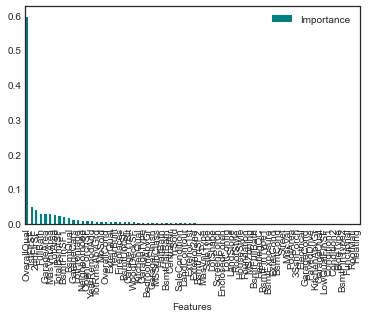

In [180]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In the above cell we can the columns arranged in descending order as per their importance weightage while predicting our target variable.



# Machine Learning Model for Regression with Evaluation Metrics


In [181]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=942)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.



# Linear Regression


In [182]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 24669.9732702971
R2 Score is: 88.45504029138067
Cross Validation Score is: 76.05393506616835
R2 Score - Cross Validation Score is 12.40110522521232


# L1 -- Lasso Regularization


In [183]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 24669.97122546664
R2 Score is: 88.45504220524447
Cross Validation Score is: 76.05394024646563
R2 Score - Cross Validation Score is 12.401101958778838


# L2 -- Ridge Regression


In [184]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 24669.966350367642
R2 Score is: 88.455046768104
Cross Validation Score is: 76.0539720906499
R2 Score - Cross Validation Score is 12.40107467745409


# Elastic Net


In [185]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 24666.77265855512
R2 Score is: 88.4580357171353
Cross Validation Score is: 76.0711123437302
R2 Score - Cross Validation Score is 12.386923373405097


# Support Vector Regression


In [186]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 72610.53064237421
R2 Score is: -0.01250035464317456
Cross Validation Score is: -6.181094755060825
R2 Score - Cross Validation Score is 6.168594400417651


In [187]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 72624.85470209415
R2 Score is: -0.051963675457589176
Cross Validation Score is: -6.218264793631496
R2 Score - Cross Validation Score is 6.166301118173907


In [188]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 66567.38617347975
R2 Score is: 15.94218971752256
Cross Validation Score is: 8.427824053143972
R2 Score - Cross Validation Score is 7.514365664378587


# Decision Tree Regressor


In [189]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 37685.23276442043
R2 Score is: 73.06000766475151
Cross Validation Score is: 69.5967075467673
R2 Score - Cross Validation Score is 3.463300117984204


# Random Forest Regressor


In [190]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 22804.431630501433
R2 Score is: 90.13507997575826
Cross Validation Score is: 84.05118721359077
R2 Score - Cross Validation Score is 6.083892762167494


# K Neighbors Regressor


In [191]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 32349.277026925753
R2 Score is: 80.14891623834271
Cross Validation Score is: 69.82284962070386
R2 Score - Cross Validation Score is 10.326066617638844


# SGD Regressor


In [192]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 26768.497323237963
R2 Score is: 86.40738398880234
Cross Validation Score is: 75.97977937864539
R2 Score - Cross Validation Score is 10.427604610156948


# Gradient Boosting Regressor


In [193]:
model=GradientBoostingRegressor()
regressor(model, x, y)


Root Mean Square Error is: 21664.611636988015
R2 Score is: 91.09657960308378
Cross Validation Score is: 85.92197362025551
R2 Score - Cross Validation Score is 5.174605982828268


# Ada Boost Regressor


In [194]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 32688.430295611477
R2 Score is: 79.73049252042452
Cross Validation Score is: 78.30981822844933
R2 Score - Cross Validation Score is 1.420674291975189


# Extra Trees Regressor


In [195]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 23618.60021210145
R2 Score is: 89.41810680724836
Cross Validation Score is: 81.41170031303453
R2 Score - Cross Validation Score is 8.006406494213834


Comparing all the above the GradientBoostingRegressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models.



# Hyper parameter tuning


In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=942)


In [197]:
x_test.shape


(234, 72)

In [198]:
y_test.shape


(234,)

In [199]:
x_train.shape


(934, 72)

In [200]:
y_train.shape


(934,)

In [201]:
#GradientBoostingRegressor?


In [202]:
GradientBoostingRegressor().get_params().keys()


dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [203]:
# creating parameters list to pass into GridSearchCV

parameters = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
              'max_features' : ['sqrt', 'log2'],
              'learning_rate' : [0.1, 0.25, 0.5],
              'random_state' : [None, 942],
              'n_estimators': [100, 200, 300]}

In [204]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)


In [209]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1, 0.25, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'random_state': [None, 942]})

In [210]:
GCV.best_params_      # printing best parameters found by GridSearchCV


{'criterion': 'friedman_mse',
 'learning_rate': 0.25,
 'loss': 'huber',
 'max_features': 'log2',
 'n_estimators': 200,
 'random_state': 942}

In [211]:
final_model = GradientBoostingRegressor(criterion = 'mse', learning_rate = 0.1, loss = 'squared_error', max_features = 'log2', n_estimators = 100, random_state = None)


In [215]:
final_fit = final_model.fit(x_train,y_train)   # final fit


ValueError: Loss 'squared_error' not supported. 

In [213]:
final_pred = final_model.predict(x_test)   # predicting with best parameters


AttributeError: 'GradientBoostingRegressor' object has no attribute 'estimators_'

In [216]:
# final accuracy score 
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

NameError: name 'final_pred' is not defined

In [217]:
# final Cross Validation score 
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: nan


In [218]:
# final RMSE
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

NameError: name 'final_pred' is not defined

We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.



In [219]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual SalePrice', fontsize=14)
plt.ylabel('Predicted SalePrice', fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

NameError: name 'final_pred' is not defined

<Figure size 576x432 with 0 Axes>

Plotting the Final model Actual SalePrice vs Predicted SalePrice we can see most of the data points are fitted in our best fit line.



# Saving the model in pickle Format


In [220]:
# pickeling or serialization of a file
import pickle
filename = 'Project_Housing_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Saving the best regression model using pickle



# Importing and Pre processing the Testing Dataset to predict the SalePrice column for Surprise Housing Project

In [221]:
test_df = pd.read_csv("Project Housing test data.csv")
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Now we are importing the test comma separated values file and viewing it in our dataframe format with the help of pandas.



In [222]:
print("We have {} Rows and {} Columns in our dataframe".format(test_df.shape[0], test_df.shape[1]))


We have 292 Rows and 80 Columns in our dataframe


Using the "shape" option we are checking the total number of rows and columns present in our testing dataset.



In [223]:
test_df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Taking a look at the missing values information and we can see some columns that do not have appropriate data and are rather filled with nulls.



In [224]:
print("Missing column values in percentage:")
for col in test_df:
    percentage = np.round((test_df[col].isnull().sum()/test_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')
    

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 15.411 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 95.205 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.342 %
MasVnrArea : 0.342 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.397 %
BsmtCond : 2.397 %
BsmtExposure : 2.397 %
BsmtFinType1 : 2.397 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.397 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.342 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Be

I am taking a look at the missing value percentage to discard columns that have most of the null values filled in them and makes no sense to treat it manually creating a biasness in our ML model.



In [225]:
# data preprocessing 1 (refering the null value precentage above)
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

# data preprocessing 2 (refering the training dataset preprocessing steps)
test_df.drop(["Id", "Utilities"], axis=1, inplace=True)

# data preprocessing 3 (refering the training dataset preprocessing steps)
for i in mode:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
for j in mean:
    test_df[j] = test_df[j].fillna(test_df[j].mean())
    
print("Missing values count after filling the data")
print(test_df.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

In [226]:
#There is one single null value present in Electrical column we can fill it with mode
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [227]:
print(test_df.isna().sum())


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

Now I have applied all the pre processing methods that were used on training dataset to treat the null values from our testing dataset too.



In [228]:
test_df.dropna(inplace=True)


making sure that there are no null values present in our final testing dataset before I proceed to encode object datatype columns.



In [229]:
numeric_datatype_test = []
for x in test_df.dtypes.index:
    if test_df.dtypes[x] == 'int64' or test_df.dtypes[x] == 'float64':
        numeric_datatype_test.append(x)
print(f"\nNumeric Datatype Column Names:", numeric_datatype_test)


Numeric Datatype Column Names: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


# Removing Skewness using yeo-johnson method


In [230]:
test_df[numeric_datatype_test].skew()


MSSubClass        1.358597
LotFrontage       0.466813
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.976804
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.683042
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [231]:
# Removing skewness using yeo-johnson method to get better prediction
skew = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'Fireplaces', 'GarageCars']


In [232]:
from sklearn.preprocessing import PowerTransformer
transf = PowerTransformer(method='yeo-johnson')

In [233]:
test_df[skew] = transf.fit_transform(test_df[skew].values)
test_df[skew].head()

MSSubClass  LotFrontage   LotArea  OverallCond  MasVnrArea  TotalBsmtSF  \
0   -1.149768     0.982253  0.842656    -0.387299    1.182923     1.931242   
1    1.337666     0.035790 -0.739104    -0.387299   -0.846534     0.451268   
2   -1.149768     0.035790  0.524304    -0.387299   -0.846534     1.587714   
3    0.705404     0.457389  0.548484     1.397520   -0.846534    -0.761116   
4    0.507343     0.982253  0.897263    -0.387299    0.952580    -0.297412   

   1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  Fireplaces  \
0  1.814725 -0.870294      1.170981     -0.263813  0.777618    0.808861   
1  0.726749 -0.870294      1.170981     -0.263813 -1.051784    0.808861   
2  1.586900 -0.870294     -0.846389     -0.263813  0.777618    0.808861   
3 -0.705442  1.137231     -0.846389     -0.263813 -1.051784    0.808861   
4 -0.584696  1.211129     -0.846389     -0.263813  0.777618    0.808861   

   GarageCars  
0    1.777376  
1    0.330046  
2    0.330046  
3   -0.988015  
4    1.777376

In [234]:
# Checking skewness after using yeo-johnson method
test_df[skew].skew()

MSSubClass      0.089921
LotFrontage     0.096846
LotArea         0.003111
OverallCond    -0.079098
MasVnrArea      0.363253
TotalBsmtSF    -0.037982
1stFlrSF       -0.000548
2ndFlrSF        0.284246
BsmtFullBath    0.341330
BsmtHalfBath    3.544994
FullBath       -0.064123
Fireplaces      0.076669
GarageCars     -0.030495
dtype: float64

In [235]:
test_df[numeric_datatype_test].skew()


MSSubClass        0.089921
LotFrontage       0.096846
LotArea           0.003111
OverallQual       0.397312
OverallCond      -0.079098
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        0.363253
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF      -0.037982
1stFlrSF         -0.000548
2ndFlrSF          0.284246
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.341330
BsmtHalfBath      3.544994
FullBath         -0.064123
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.076669
GarageYrBlt      -0.683042
GarageCars       -0.030495
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

We can see using yeo-johnson method the skewness has been removed from majority of the columns. The rest would be categorically encoded columns which dont require skewness removal.



In [236]:
test_df.head(3)


MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   -1.149768       RL     0.982253  0.842656   Pave      IR1         HLS   
1    1.337666       RL     0.035790 -0.739104   Pave      IR1         Lvl   
2   -1.149768       RL     0.035790  0.524304   Pave      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            9    -0.387299       2005          2006       Hip  CompShg   
1            8    -0.387299       1984          1984     Gable  CompShg   
2            8    -0.387299       2001          2001       Hip  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd      Stone    1.182923        Gd        TA   
1     HdBoard     HdBoard       None   -0.846534        Gd        TA   
2     VinylSd     VinylSd       None   -0.846534        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Ex       TA           Gd          GLQ        1249   
1     CBlock       Gd       TA           Av          GLQ        1036   
2      PConc       Gd       TA           Av          Unf           0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        673     1.931242    GasA        Ex   
1          Unf           0        184     0.451268    GasA        Gd   
2          Unf           0       1753     1.587714    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  1.814725 -0.870294             0       1922   
1          Y      SBrkr  0.726749 -0.870294             0       1360   
2          Y      SBrkr  1.586900 -0.870294             0       1788   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      1.170981     -0.263813  0.777618         0             3             1   
1      1.170981     -0.263813 -1.051784         0             1             1   
2     -0.846389     -0.263813  0.777618         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ    0.808861     Attchd       2005.0   
1          Gd             4        Typ    0.808861     Attchd       1984.0   
2          Ex             7        Typ    0.808861     Attchd       2001.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Fin    1.777376         676         TA         TA          Y   
1          RFn    0.330046         565         TA         TA          Y   
2          RFn    0.330046         522         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         178           51              0          0            0         0   
1          63            0              0          0            0         0   
2         202          151              0          0            0         0   

   MiscVal  MoSold  YrSold SaleType SaleCondition  
0        0       7    2007       WD        Normal  
1        0       8    2009      COD       Abnorml  
2        0       6    2009       WD        Normal

In [237]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(test_df, column):
    test_df[column] = oe.fit_transform(test_df[column])
    return test_df

X=ordinal_encode(test_df, object_datatype)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0   -1.149768       2.0     0.982253  0.842656     1.0       0.0          1.0   
1    1.337666       2.0     0.035790 -0.739104     1.0       0.0          3.0   
2   -1.149768       2.0     0.035790  0.524304     1.0       3.0          3.0   
3    0.705404       2.0     0.457389  0.548484     1.0       3.0          0.0   
4    0.507343       2.0     0.982253  0.897263     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            9    -0.387299       2005          2006        3.0   
1         2.0            8    -0.387299       1984          1984        1.0   
2         2.0            8    -0.387299       2001          2001        3.0   
3         5.0            7     1.397520       1941          1950        1.0   
4         5.0            6    -0.387299       2007          2007        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0          9.0         11.0         3.0    1.182923        2.0   
1       0.0          5.0          5.0         2.0   -0.846534        2.0   
2       0.0          9.0         11.0         2.0   -0.846534        2.0   
3       0.0          6.0          7.0         2.0   -0.846534        3.0   
4       0.0          9.0         11.0         3.0    0.952580        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        3.0         2.0       0.0       2.0           1.0           2.0   
1        3.0         1.0       2.0       2.0           0.0           2.0   
2        3.0         2.0       2.0       2.0           0.0           5.0   
3        3.0         1.0       3.0       2.0           3.0           4.0   
4        3.0         2.0       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0        1249           5.0           0        673     1.931242      0.0   
1        1036           5.0           0        184     0.451268      0.0   
2           0           5.0           0       1753     1.587714      0.0   
3         275           5.0           0        429    -0.761116      0.0   
4           0           5.0           0        894    -0.297412      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         3.0  1.814725 -0.870294             0   
1        2.0         1.0         3.0  0.726749 -0.870294             0   
2        0.0         1.0         3.0  1.586900 -0.870294             0   
3        0.0         1.0         3.0 -0.705442  1.137231             0   
4        0.0         1.0         3.0 -0.584696  1.211129             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922      1.170981     -0.263813  0.777618         0             3   
1       1360      1.170981     -0.263813 -1.051784         0             1   
2       1788     -0.846389     -0.263813  0.777618         0             3   
3       1564     -0.846389     -0.263813 -1.051784         1             3   
4       1933     -0.846389     -0.263813  0.777618         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          2.0             8         5.0    0.808861   
1             1          2.0             4         5.0    0.808861   
2             1          0.0             7         5.0    0.808861   
3             1          

With the help of "OrdinalEncoder" and using it inside a function I have converted all object datatype feature columns into numeric datatype that can be understood by the machine learning model.



In [238]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(X.shape[0], X.shape[1]))


Shape of our data frame post encoding shows 292 Rows and 73 columns



Once again I am taking a look at the number of rows and columns present for our testing dataset containing feature columns.



In [239]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -1.149768 -0.287006     0.982253  0.842656  0.083045 -1.402669   
1    1.337666 -0.287006     0.035790 -0.739104  0.083045 -1.402669   
2   -1.149768 -0.287006     0.035790  0.524304  0.083045  0.745474   
3    0.705404 -0.287006     0.457389  0.548484  0.083045  0.745474   
4    0.507343 -0.287006     0.982253  0.897263  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.566101  -2.001106  -0.226274      1.554460   -0.028763   -0.058621   
1     0.299297  -1.351136  -0.226274      1.554460   -0.028763   -0.058621   
2     0.299297   0.598774  -0.226274     -1.281387   -0.028763   -0.058621   
3    -3.998799   0.598774  -0.226274     -1.114572   -0.028763   -0.058621   
4     0.299297  -1.351136  -0.226274      1.387645   -1.228602   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0 -0.444642   -0.518671     2.157766    -0.387299   1.065430      1.031595   
1  2.722077   -0.518671     1.419117    -0.387299   0.374523     -0.064496   
2 -0.444642   -0.518671     1.419117    -0.387299   0.933828      0.782483   
3 -0.444642    1.011146     0.680468     1.397520  -1.040191     -1.758454   
4 -0.444642    1.011146    -0.058181    -0.387299   1.131230      1.081417   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0   1.846195 -0.078757     0.694397     0.733065    1.952161    1.182923   
1  -0.523427 -0.078757    -1.046066    -1.248926    0.355435   -0.846534   
2   1.846195 -0.078757     0.694397     0.733065    0.355435   -0.846534   
3  -0.523427 -0.078757    -0.610950    -0.588262    0.355435   -0.846534   
4  -0.523427 -0.078757     0.694397     0.733065    1.952161    0.952580   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0  -0.857858   0.326787    0.776109 -2.549340     0.219     -1.192678   
1  -0.857858   0.326787   -0.518884 -0.303768     0.219     -2.090260   
2  -0.857858   0.326787    0.776109 -0.303768     0.219     -2.090260   
3   0.633181   0.326787   -0.518884  0.819019     0.219      0.602487   
4  -0.857858   0.326787    0.776109 -0.303768     0.219     -0.295096   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.377559    1.888202      0.296045   -0.303257   0.281925     1.931242   
1     -0.377559    1.391494      0.296045   -0.303257  -0.909772     0.451268   
2      1.284459   -1.024418      0.296045   -0.303257   2.913893     1.587714   
3      0.730453   -0.383129      0.296045   -0.303257  -0.312705    -0.761116   
4      1.284459   -1.024418      0.296045   -0.303257   0.820504    -0.297412   

    Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.141879  -0.880154    0.248633    0.312609  1.814725 -0.870294   
1 -0.141879   0.645098    0.248633    0.312609  0.726749 -0.870294   
2 -0.141879  -0.880154    0.248633    0.312609  1.586900 -0.870294   
3 -0.141879  -0.880154    0.248633    0.312609 -0.705442  1.137231   
4 -0.141879  -0.880154    0.248633    0.312609 -0.584696  1.211129   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.097029   0.866809      1.170981     -0.263813  0.777618 -0.727992   
1     -0.097029  -0.228029      1.170981     -0.263813 -1.051784 -0.727992   
2     -0.097029   0.605762     -0.846389     -0.263813  0.777618 -0.727992   
3     -0.097029   0.169385     -0.846389     -0.263813 -1.051784  1.296518   
4     -0.097029   0.888238     -0.846389     -0.263813  0.777618  1.296518   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0      0.254952     -0.217895    -0.469314      0.917136     0.22482   
1     -2.226584     -0.217895    -0.469314     -1.401511     0.22482   
2      0.254952     -0.217895    -2.916451      0.337474     0.22482   
3      0.254952     -0.217895    -1.692883      0.337474     0.22482   
4      1.49

Before jumping to pridicting the target label I am applying scaling technique to ensure that the model does not get baised towards a particular feature.



In [240]:
# Dropping GrLivArea column as it contains high VIF value
X.drop(["GrLivArea"],axis=1,inplace=True)

# Prediction of Sale Price column


In [241]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Predicted_Sales = final_model.predict(X)
predicted_output = pd.DataFrame()
predicted_output['SalePrice']=Predicted_Sales
predicted_output.head(10)  # showing only first 10 outputs

AttributeError: 'GradientBoostingRegressor' object has no attribute 'estimators_'

Using the best regression model I have predicted the Sale Price for our test dataset and stored it in a dataframe.



In [242]:
final_test_data = pd.concat([test_df, predicted_output], axis=1)
final_test_data.head()

NameError: name 'predicted_output' is not defined

Here I am concatenating the test dataset and predicted Sale Price dataframe so that they can resemble the training dataset.



In [243]:
final_test_data.to_csv("Predicted_Sales_Data.csv", index=False)


NameError: name 'final_test_data' is not defined

With the help of to_csv I have exported the entire dataset in comma separated values format that can be checked using the Excel.



# Inference:


# Thank You